# Problem Statement:

To create a Linear Regression Model based on the Ames Housing Dataset to predict the price of a house.<br>
To Identify what are the features that will influence price of a house in Ames.

# Executive Summary

<font color=blue> 
### Contents:
- [Import Library](#Import-Library)
- [Import Read Train CSV](#Import-and-Read-CSV-File-for-Train-Dataset)
- [EDA and Data Cleaning for Train Dataset](#EDA-and-Data-Cleaning-for-Train-Dataset)
- [Import and Read Cleaned Train and Test Dataset](#Import-and-Read-Cleaned-Train-and-Test-Dataset)
- [Create and Add New Columns for Train and Test Dataset](#Create-and-Add-New-Columns-for-Train-and-Test-Dataset)
- [Binary Category Ordinary Category Mapping for Train and Test Dataset](#Binary-Category-Ordinary-Category-Mapping-for-Train-and-Test-Dataset)
- [One-hot Encode Categorial Variables for Train and Test Dataset](#One-hot-Encode-Categorial-Variables-for-Train-and-Test-Dataset)
- [Add Interaction Term for Train and Test Dataset](#Add-Interaction-Term-for-Train-and-Test-Dataset)
- [Dealing with Outliers for Train Dataset](#Dealing-with-Outliers-for-Train-Dataset)
- [Split train_test Dataset into train_final and test_final and Export to csv](#Split-train-test-Dataset-into-train-final-and-test_final-and-Export-to-csv)
- [Feature Selection: Filtering method](#Feature-Selection:-Filtering-method)
- [Modelling with Selected Features Based on Correlation with Target](#Modelling-with-Selected-Features-Based-on-Correlation-with-Target)
- [Apply Model on Test Dataset](#Apply-Model-on-Test-Dataset)   
- [Conclusion and Recommendations](#Conclusion-and-Recommendations)   



# Import Library 

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict
from sklearn.linear_model import LinearRegression,RidgeCV, LassoCV, Ridge, Lasso
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

# Import and Read CSV File for Train Dataset

In [2]:
# import and read train csv file.
train_csv='./datasets/train.csv'
train=pd.read_csv(train_csv)

In [3]:
# Set option to view all columns
pd.set_option('display.max_columns', 500)

In [4]:
# Preview 2 rows of train dataset
train.head(2)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000


# EDA and Data Cleaning for Train Dataset

In [5]:
# Check the shape of data
train.shape

(2051, 81)

In [6]:
# To get descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution
train.describe()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2051.000000,2.051000e+03,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,2050.000000,2050.000000,2050.000000,2050.000000,2051.000000,2051.000000,2051.000000,2051.000000,2049.000000,2049.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,1937.000000,2050.000000,2050.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,442.300488,47.959024,567.728293,1057.987805,1164.488055,329.329108,5.512921,1499.330083,0.427526,0.063446,1.577279,0.371039,2.843491,1.042906,6.435885,0.590931,1978.707796,1.776585,473.671707,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,461.204124,165.000901,444.954786,449.410704,396.446923,425.671046,51.068870,500.447829,0.522673,0.251705,0.549279,0.501043,0.826618,0.209790,1.560225,0.638516,25.441094,0.764537,215.934561,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,0.000000,0.000000,220.000000,793.000000,879.500000,0.000000,0.000000,1129.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,319.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,368.000000,0.000000,474.500000,994.500000,1093.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,733.750000,0.000000,811.000000,1318.750000,1405.000000,692.500000,0.000000,1728.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,5095.000000,1862.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1418.000000,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


In [7]:
# Check train dataset data type and if there's any null values
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
Id                 2051 non-null int64
PID                2051 non-null int64
MS SubClass        2051 non-null int64
MS Zoning          2051 non-null object
Lot Frontage       1721 non-null float64
Lot Area           2051 non-null int64
Street             2051 non-null object
Alley              140 non-null object
Lot Shape          2051 non-null object
Land Contour       2051 non-null object
Utilities          2051 non-null object
Lot Config         2051 non-null object
Land Slope         2051 non-null object
Neighborhood       2051 non-null object
Condition 1        2051 non-null object
Condition 2        2051 non-null object
Bldg Type          2051 non-null object
House Style        2051 non-null object
Overall Qual       2051 non-null int64
Overall Cond       2051 non-null int64
Year Built         2051 non-null int64
Year Remod/Add     2051 non-null int64
Roof Style         20

In [8]:
# To view unique value,and unique value count for each columns
for c in train.columns:
    print ("---- %s ---" % c)
    print (train[c].value_counts())
    print('Unique_Value_Count: '+ str((len(train[c].unique()))))
    

---- Id ---
2047    1
2787    1
1058    1
1060    1
1062    1
1066    1
1068    1
1070    1
1072    1
1074    1
1076    1
1078    1
1080    1
1082    1
1084    1
1086    1
1088    1
1090    1
1094    1
1096    1
1098    1
1100    1
1102    1
1104    1
1106    1
1108    1
1110    1
1118    1
1120    1
1124    1
       ..
2536    1
471     1
473     1
2522    1
475     1
2524    1
477     1
2526    1
479     1
2528    1
2530    1
485     1
2534    1
487     1
489     1
2556    1
491     1
2540    1
493     1
2542    1
495     1
2544    1
497     1
2546    1
2548    1
2550    1
2552    1
505     1
507     1
2049    1
Name: Id, Length: 2051, dtype: int64
Unique_Value_Count: 2051
---- PID ---
532351060    1
535303150    1
909250210    1
905377130    1
527403020    1
535452060    1
923252080    1
535455090    1
909131125    1
534476150    1
528290170    1
903202170    1
905201020    1
903456130    1
923228290    1
923252100    1
905201030    1
535152010    1
909129100    1
909428110    1
916

0.0       657
24.0       17
16.0       10
300.0       7
384.0       7
20.0        7
700.0       6
624.0       6
456.0       6
360.0       6
312.0       6
368.0       6
1200.0      5
648.0       5
330.0       5
288.0       5
553.0       5
432.0       5
637.0       5
686.0       5
625.0       5
120.0       5
276.0       5
841.0       4
336.0       4
495.0       4
904.0       4
507.0       4
500.0       4
528.0       4
         ... 
186.0       1
1080.0      1
1440.0      1
242.0       1
78.0        1
952.0       1
1012.0      1
296.0       1
328.0       1
424.0       1
236.0       1
376.0       1
526.0       1
968.0       1
445.0       1
1571.0      1
443.0       1
1163.0      1
1606.0      1
567.0       1
909.0       1
895.0       1
1013.0      1
1277.0      1
63.0        1
848.0       1
70.0        1
688.0       1
472.0       1
661.0       1
Name: BsmtFin SF 1, Length: 821, dtype: int64
Unique_Value_Count: 822
---- BsmtFin Type 2 ---
Unf    1749
Rec      80
LwQ      60
BLQ      48
ALQ 

0        1986
400        12
500         8
600         6
2000        5
450         5
700         4
2500        2
4500        2
3000        2
1200        2
80          1
8300        1
12500       1
460         1
300         1
54          1
3500        1
480         1
650         1
800         1
900         1
1150        1
1300        1
1500        1
6500        1
455         1
17000       1
Name: Misc Val, dtype: int64
Unique_Value_Count: 28
---- Mo Sold ---
6     352
7     303
5     257
4     208
3     168
8     167
10    123
9     109
2     104
11    103
1      79
12     78
Name: Mo Sold, dtype: int64
Unique_Value_Count: 12
---- Yr Sold ---
2007    498
2009    446
2006    438
2008    435
2010    234
Name: Yr Sold, dtype: int64
Unique_Value_Count: 5
---- Sale Type ---
WD       1781
New       160
COD        63
ConLD      17
CWD        10
ConLI       7
ConLw       5
Oth         4
Con         4
Name: Sale Type, dtype: int64
Unique_Value_Count: 9
---- SalePrice ---
130000    25
140000    22

In [9]:
# To list columns which contain null value and count of null value
null_columns=train.columns[train.isnull().any()]
train[null_columns].isnull().sum()

Lot Frontage       330
Alley             1911
Mas Vnr Type        22
Mas Vnr Area        22
Bsmt Qual           55
Bsmt Cond           55
Bsmt Exposure       58
BsmtFin Type 1      55
BsmtFin SF 1         1
BsmtFin Type 2      56
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Bsmt Full Bath       2
Bsmt Half Bath       2
Fireplace Qu      1000
Garage Type        113
Garage Yr Blt      114
Garage Finish      114
Garage Cars          1
Garage Area          1
Garage Qual        114
Garage Cond        114
Pool QC           2042
Fence             1651
Misc Feature      1986
dtype: int64

<font color=blue> The Train datasets comprises of 2051 observations with 81 columns.<br>
The Train datasets comprises house attributes described in both categorial and numerical.<br>
There are 26 columns with null values.

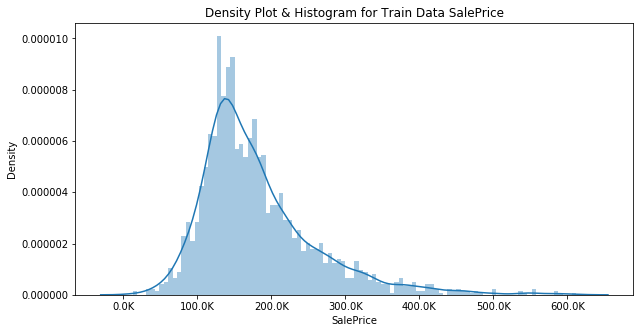

In [10]:
# Density Plot & Histogram for Train Data SalePrice
fig, ax = plt.subplots(figsize=(10,5))
ax=sns.distplot(train['SalePrice'],kde=True,bins=100)
xlabels = ['{}'.format(x) + 'K' for x in ax.get_xticks()/1000]
ax.set_xticklabels(xlabels)
ax.set_title('Density Plot & Histogram for Train Data SalePrice')
ax.set_xlabel('SalePrice')
ax.set_ylabel('Density');

<font color=blue> The distribution of train data SalePrice has a right-skewed distribution. Most of the transaction are priced bewtween 100k-200k.

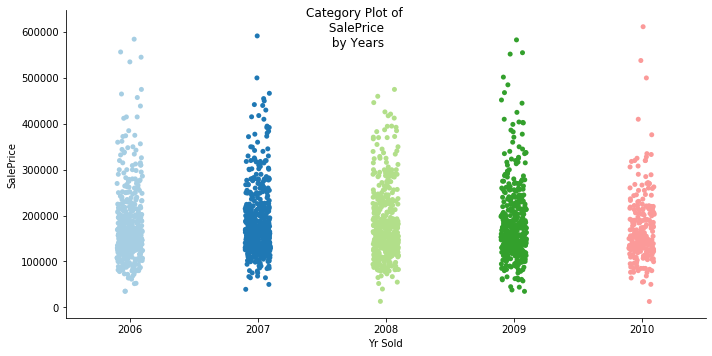

In [11]:

ax=sns.catplot(x="Yr Sold",y="SalePrice",data=train,palette='Paired',legend=True,height=5, aspect=2)
ax.fig.suptitle('Category Plot of \n SalePrice \n by Years');

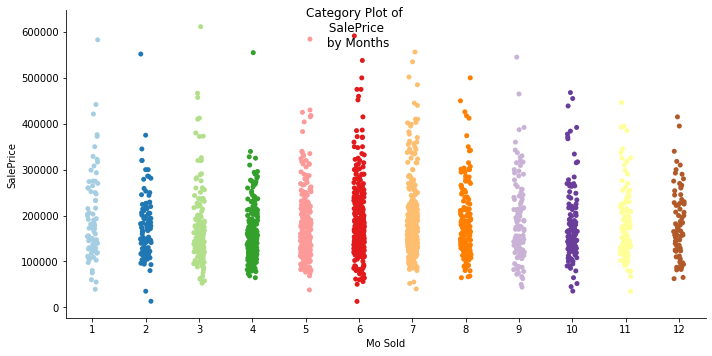

In [12]:
ax=sns.catplot(x="Mo Sold",y="SalePrice",data=train,palette='Paired',legend=True,height=5, aspect=2)
ax.fig.suptitle('Category Plot of \n SalePrice \n by Months');

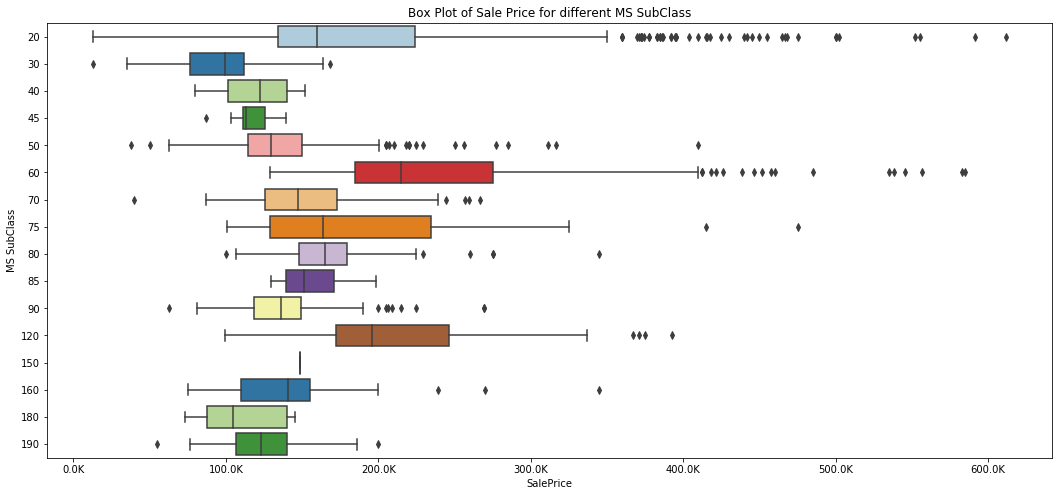

In [13]:
fig, ax = plt.subplots(figsize=(18,8))
ax=sns.boxplot(x="SalePrice",y="MS SubClass",data=train,palette='Paired',orient='h')
xlabels = ['{}'.format(x) + 'K' for x in ax.get_xticks()/1000]
ax.set_xticklabels(xlabels)
ax.set_title('Box Plot of Sale Price for different MS SubClass');

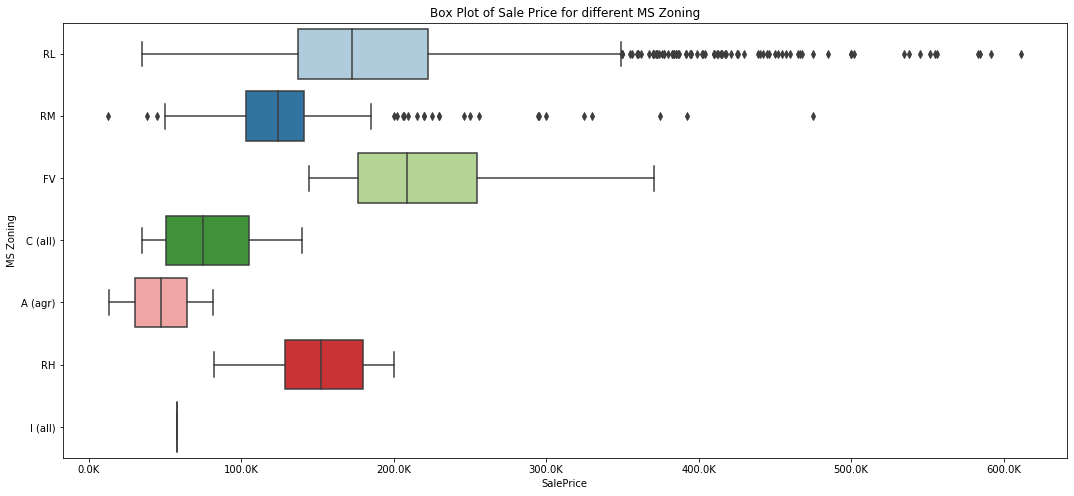

In [14]:
fig, ax = plt.subplots(figsize=(18,8))
ax=sns.boxplot(x="SalePrice",y="MS Zoning",data=train,palette='Paired',orient='h')
xlabels = ['{}'.format(x) + 'K' for x in ax.get_xticks()/1000]
ax.set_xticklabels(xlabels)
ax.set_title('Box Plot of Sale Price for different MS Zoning');

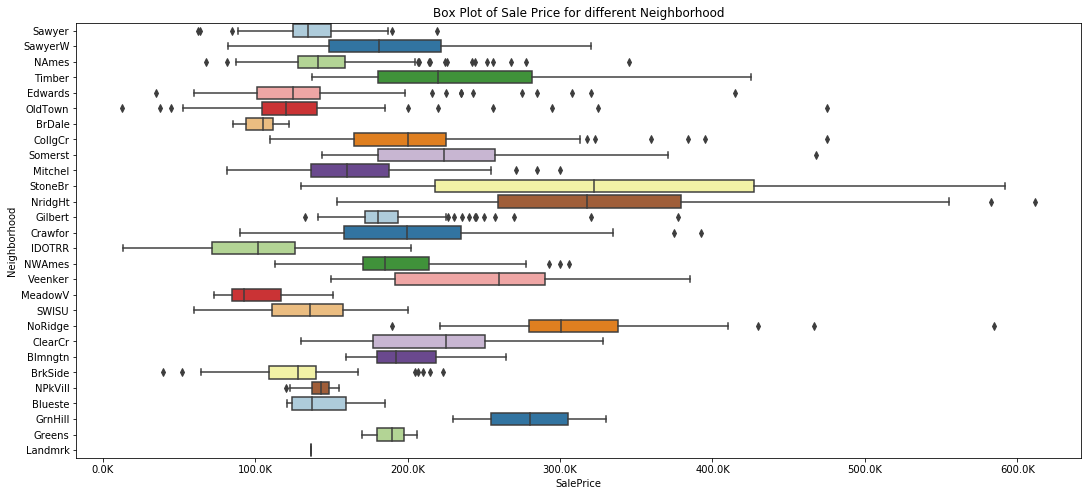

In [15]:
fig, ax = plt.subplots(figsize=(18,8))
ax=sns.boxplot(x="SalePrice",y="Neighborhood",data=train,palette='Paired',orient='h')
xlabels = ['{}'.format(x) + 'K' for x in ax.get_xticks()/1000]
ax.set_xticklabels(xlabels)
ax.set_title('Box Plot of Sale Price for different Neighborhood');

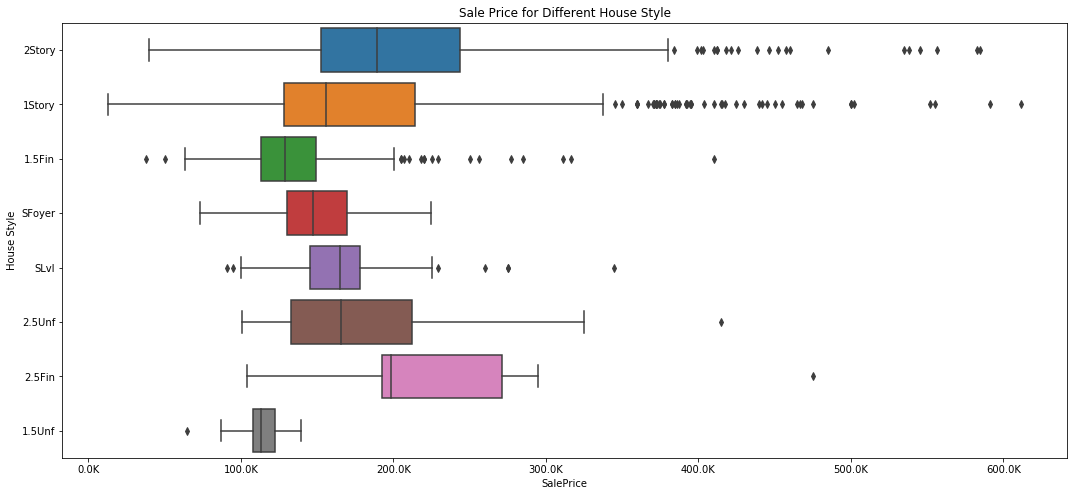

In [16]:
# Plot Boxplot for Sale Price of Different House Style
fix, ax = plt.subplots(figsize=(18,8))
ax= sns.boxplot(y='House Style',x='SalePrice',data=train,orient='h')
xlabels = ['{}'.format(x) + 'K' for x in ax.get_xticks()/1000]
ax.set_xticklabels(xlabels)
ax.set_title('Sale Price for Different House Style');

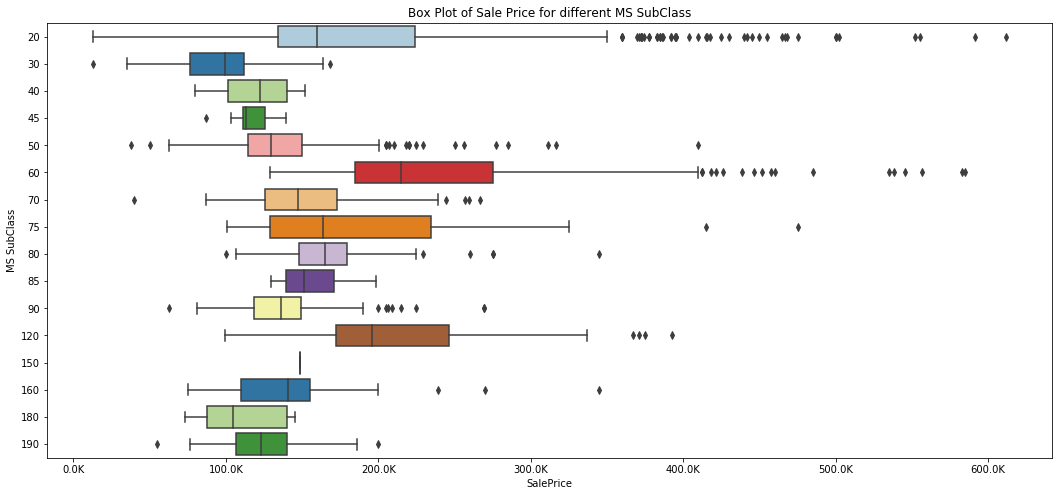

In [17]:
fig, ax = plt.subplots(figsize=(18,8))
ax=sns.boxplot(x="SalePrice",y="MS SubClass",data=train,palette='Paired',orient='h')
xlabels = ['{}'.format(x) + 'K' for x in ax.get_xticks()/1000]
ax.set_xticklabels(xlabels)
ax.set_title('Box Plot of Sale Price for different MS SubClass');

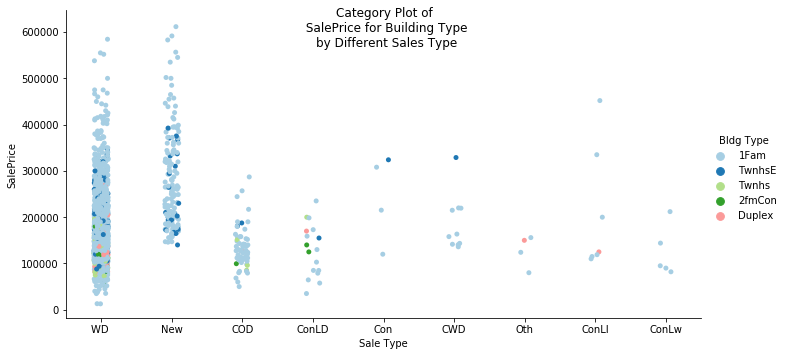

In [18]:

ax=sns.catplot(x="Sale Type",y="SalePrice",data=train,hue='Bldg Type',palette='Paired',legend=True,height=5, aspect=2)
ax.fig.suptitle('Category Plot of \n SalePrice for Building Type \nby Different Sales Type');

<font color=blue>Most of the Sales Type between Year 2006 to Year 2010 are WD- Warranty Deed - Conventional, followed by New- Home just constructed and sold. Majority of the building type sold are 1Fam-Single-family Detached.

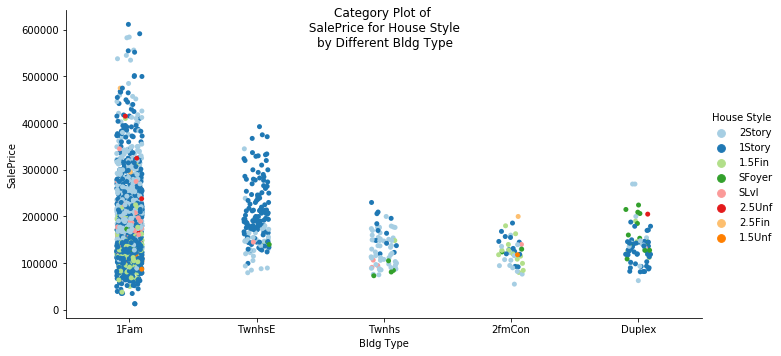

In [19]:
ax=sns.catplot(x="Bldg Type",y="SalePrice",data=train,hue='House Style',palette='Paired',legend=True,height=5, aspect=2)
ax.fig.suptitle('Category Plot of \n SalePrice for House Style \nby Different Bldg Type');

<font color=blue> Most of the sales transaction involved Single-family Detached building with a mix of 1story, 2story and 1.5story and followed by Townhouse End Unit building with one story.

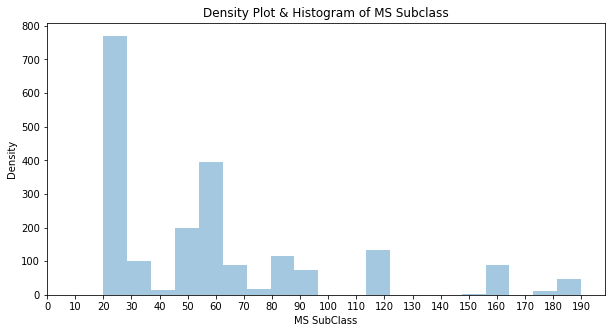

In [20]:
# Density Plot & Histogram for Train Data MS SubClass
fig, ax = plt.subplots(figsize=(10,5))
sns.distplot(train['MS SubClass'],kde=False,bins=20).set_xticks(np.arange(0,191,10))
ax.set_title('Density Plot & Histogram of MS Subclass')
ax.set_xlabel('MS SubClass')
ax.set_ylabel('Density');

Handling Null Values

In [23]:
# plot a histogram to check on Lot Frontage frequency distribution.
# plt.hist(train['Lot Frontage'])
# plt.title('Histogram of Lot Frontage')
# plt.xlabel('Lot Frontage')
# plt.ylabel('Frequency');

<font color=blue>330 null value in Lot Frontage is due to units with no Frontage. The distribution of Lot Frontage in the train data is not normally distributed, thus the null value is replaced by the median value of Lot Frontage.

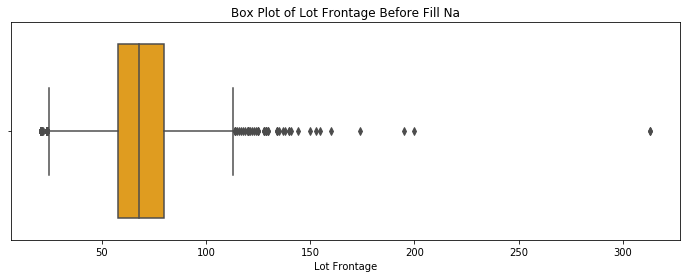

In [24]:
# Plot a boxplot of Lot Frontage Before Fill Na 
fix, ax = plt.subplots(figsize=(12,4))
ax= sns.boxplot(y='Lot Frontage',data=train,orient='h',color='orange').set_title('Box Plot of Lot Frontage Before Fill Na')

<font color=blue> Box Plot of Lot Frontage Before Fill Na showing distribution of data before fillna.

In [25]:
# Fill Lot Frontage Null Value with Lot Frontage column's median
train['Lot Frontage']=train['Lot Frontage'].fillna(value=train['Lot Frontage'].median())

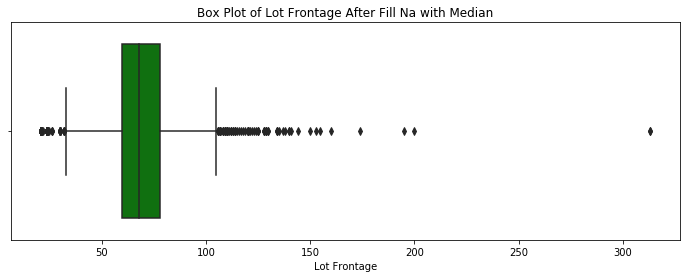

In [26]:
# Plot a boxplot of Lot Frontage After Filling Na  with Lot Frontage median
fix, ax = plt.subplots(figsize=(12,4))
ax= sns.boxplot(y='Lot Frontage',data=train,orient='h',color='green').set_title('Box Plot of Lot Frontage After Fill Na with Median')

<font color=blue>Box Plot of Lot Frontage After Fill Na showing distribution of data after fillna.No major impact after fillna with Lot Frontage median.

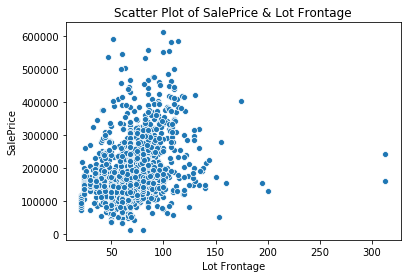

In [27]:
# Plot a scatterplot to see relationship between Lot Frontage and SalePrice
sns.scatterplot(x='Lot Frontage',y='SalePrice',data=train).set_title('Scatter Plot of SalePrice & Lot Frontage');

<font color=blue> Scatter plot between SalePrice and LotFrontage shows the 2 outliers of Lot Frontage has SalePrice within arange from 150K to 250K.<br>
The outlier seems to be variability in the data. Thus the outliers were not removed.

<font color=blue>
1911 null value in Alley is due to units with no Alley acess. Alley column comprises categorial variable, thus the null values will be updated with value'0'.

In [28]:
# Update Null value in Alley column with 0
train['Alley']=train['Alley'].fillna(value=0)

In [29]:
# Check if update is done properly
train[train['Alley'].isnull()]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice


<font color=blue>
The 22 null value in Mas Vnr Type & Mas Vnr Area are due to missing value. Null value for Mas Vnr Type is filled with the mode item 'None' while null value for Mas Vnr Area is filled with value '0' (corressponding value for None Mas Vnr Area).

In [30]:
# Update Null value in Mas Vnr Type column with it's mode
train['Mas Vnr Type']= train['Mas Vnr Type'].fillna(train['Mas Vnr Type'].mode()[0])

In [31]:
# Check if update is done properly
train[train['Mas Vnr Type'].isnull()]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice


C:\Users\user\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\user\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


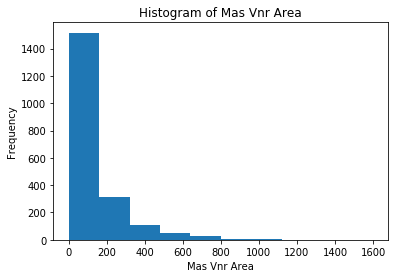

In [32]:
# plot a histogram to check on Mas Vnr Area frequency distribution.
plt.hist(train['Mas Vnr Area'])
plt.title('Histogram of Mas Vnr Area')
plt.xlabel('Mas Vnr Area')
plt.ylabel('Frequency');

<font color=blue>
Histogram of Mas Vnr Area shows there are high frequency in '0'.

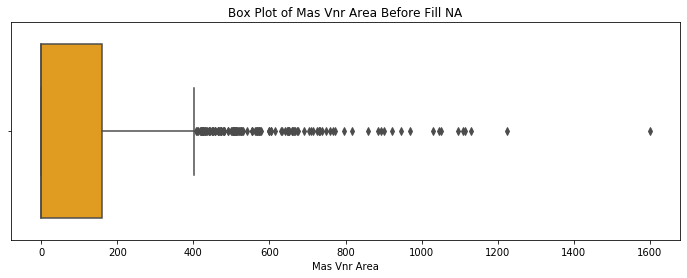

In [33]:
# Plot a boxplot of Mas Vnr Area Before Fill Na 
fix, ax = plt.subplots(figsize=(12,4))
ax= sns.boxplot(y='Mas Vnr Area',data=train,orient='h',color='orange').set_title('Box Plot of Mas Vnr Area Before Fill NA')

<font color=blue>
Box Plot of Mas Vnr Area Before Fill Na showing distribution of data before fillna.

In [34]:
# Update Null value in Mas Vnr Area column with 0
train['Mas Vnr Area']=train['Mas Vnr Area'].fillna(value=0)

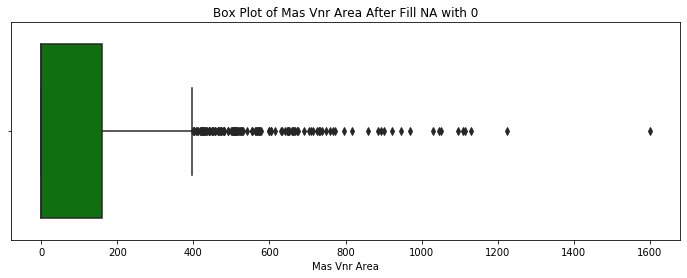

In [35]:
# Plot a boxplot of Mas Vnr Area After Fill Na 
fix, ax = plt.subplots(figsize=(12,4))
ax= sns.boxplot(y='Mas Vnr Area',data=train,orient='h',color='green').set_title('Box Plot of Mas Vnr Area After Fill NA with 0')

<font color=blue>
Box Plot of Mas Vnr Area After Fill Na showing distribution of data after fillna.No major impact after fillna with value 0.

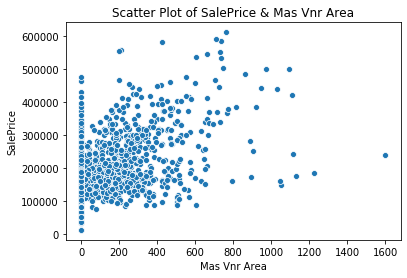

In [36]:
# Plot a scatterplot to see relationship between Lot Frontage and SalePrice
sns.scatterplot(x='Mas Vnr Area',y='SalePrice',data=train).set_title('Scatter Plot of SalePrice & Mas Vnr Area');

<font color=blue>Scatter plot between SalePrice and Mas Vnr Area shows outliers of Mas Vnr Area has SalePrice within arange from 200K to 300K.
The outlier seems to be variability in the data. Thus the outliers were not removed.

<font color=blue>
The 55 null value in Bsmt Qual,Bsmt Cond, BsmtFin Type 1,Bsmt Exposure,BsmtFin Type 2 are due to housing with no basement. Null value for Bsmt Qual,Bsmt Cond & BsmtFin Type 1,Bsmt Exposure,BsmtFin Type 2 are filled with '0'.

In [37]:
# Check all 5 columns of Bsmt Qual,Bsmt Cond, BsmtFin Type 1,Bsmt Exposure and BsmtFin Type 2 is null
check_basement=train[(train['Bsmt Qual'].isnull())&(train['Bsmt Cond'].isnull())&(train['BsmtFin Type 1'].isnull())&(train['Bsmt Exposure'].isnull())&(train['BsmtFin Type 2'].isnull())]
check_basement[['Id','Bsmt Qual','Bsmt Cond','BsmtFin Type 1','Bsmt Exposure','BsmtFin Type 2']]

,Id,Bsmt Qual,Bsmt Cond,BsmtFin Type 1,Bsmt Exposure,BsmtFin Type 2
12,807,NaN,NaN,NaN,NaN,NaN
93,811,NaN,NaN,NaN,NaN,NaN
114,781,NaN,NaN,NaN,NaN,NaN
146,888,NaN,NaN,NaN,NaN,NaN
183,1554,NaN,NaN,NaN,NaN,NaN
240,2740,NaN,NaN,NaN,NaN,NaN
249,2242,NaN,NaN,NaN,NaN,NaN
256,2745,NaN,NaN,NaN,NaN,NaN
390,84,NaN,NaN,NaN,NaN,NaN
437,1501,NaN,NaN,NaN,NaN,NaN


In [38]:
# Update null value for columns 'Bsmt Qual','Bsmt Cond','BsmtFin Type 1','Bsmt Exposure','BsmtFin Type 2' with value 0
train.update(train[['Bsmt Qual','Bsmt Cond','BsmtFin Type 1','Bsmt Exposure','BsmtFin Type 2']].fillna(value=0))

In [39]:
# check on last 2 ID returned in queries above to ensure changes has been correctly made. 
train[(train['Id']==2338)|(train['Id']==2880)]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1933,2338,527226010,60,RL,68.0,14762,Pave,0,IR2,Lvl,AllPub,Corner,Gtl,Gilbert,Feedr,Norm,1Fam,2Story,5,6,1948,1950,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,Slab,0,0,0,0,0.0,0,0.0,0.0,0.0,GasA,Gd,Y,SBrkr,1547,720,53,2320,0.0,0.0,2,0,2,1,TA,7,Typ,1,TA,Attchd,1979.0,Unf,2.0,672.0,TA,TA,P,120,144,0,0,0,0,NaN,NaN,NaN,0,5,2006,WD,169000
2010,2880,911175410,30,C (all),69.0,12366,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Feedr,Norm,1Fam,1Story,3,5,1945,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,Slab,0,0,0,0,0.0,0,0.0,0.0,0.0,GasA,TA,N,SBrkr,729,0,0,729,0.0,0.0,1,0,2,1,TA,5,Mod,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,0,0,23,0,0,0,NaN,NaN,NaN,0,10,2006,WD,51689


In [40]:
# Check all 4 columns of BsmtFin SF 1,BsmtFin SF 2, Bsmt Unf SF and Total Bsmt SF is null
check_basement_2=train[(train['BsmtFin SF 1'].isnull())&(train['BsmtFin SF 2'].isnull())&(train['Bsmt Unf SF'].isnull())&(train['Total Bsmt SF'].isnull())]
check_basement_2[['Id','BsmtFin SF 1','BsmtFin SF 2','Bsmt Unf SF','Total Bsmt SF']]

,Id,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF
1327,1342,NaN,NaN,NaN,NaN


<font color=blue>The 4 null value in BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF are due to housing with no basement. Null value for BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF are filled with '0'.

In [41]:
# Update null value for columns 'BsmtFin SF 1','BsmtFin SF 2','Bsmt Unf SF','Total Bsmt SF' with value 0
train.update(train[['BsmtFin SF 1','BsmtFin SF 2','Bsmt Unf SF','Total Bsmt SF']].fillna(value=0))

In [42]:
#check on last ID returned in queries above to ensure changes has been correctly made.
train[train['Id']==1342]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1327,1342,903230120,20,RM,99.0,5940,Pave,0,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,0,0,0,0,0.0,0,0.0,0.0,0.0,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,79000


<font color=blue> The 2 null value in Bsmt Full Bath & Bsmt Half Bath are due to housing with no basement. Null value for Bsmt Full Bath & Bsmt Half Bath are filled with '0.0'.

In [43]:
# Check all 3 columns of Bsmt Full Bath,Bsmt Half Bath is null
check_basement_3=train[(train['Bsmt Full Bath'].isnull())&(train['Bsmt Half Bath'].isnull())]
check_basement_3[['Id','Bsmt Full Bath','Bsmt Half Bath']]

,Id,Bsmt Full Bath,Bsmt Half Bath
616,1498,NaN,NaN
1327,1342,NaN,NaN


In [44]:
# Update null value for columns 'Bsmt Full Bath','Bsmt Half Bath' with value 0
train.update(train[['Bsmt Full Bath','Bsmt Half Bath']].fillna(value=0))

In [45]:
# check on last 2 ID returned in queries above to ensure changes has been correctly made.
train[(train['Id']==1498)|(train['Id']==1342)]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
616,1498,908154080,20,RL,123.0,47007,Pave,0,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1959,1996,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,Slab,0,0,0,0,0.0,0,0.0,0.0,0.0,GasA,TA,Y,SBrkr,3820,0,0,3820,0.0,0.0,3,1,5,1,Ex,11,Typ,2,Gd,Attchd,1959.0,Unf,2.0,624.0,TA,TA,Y,0,372,0,0,0,0,NaN,NaN,NaN,0,7,2008,WD,284700
1327,1342,903230120,20,RM,99.0,5940,Pave,0,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,0,0,0,0,0.0,0,0.0,0.0,0.0,GasA,TA,Y,FuseA,896,0,0,896,0.0,0.0,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,79000


<font color=blue>
Data cleaning for other 4 Garage columns (Garage Finish,Garage Qual,Garage Cond & Garage Yr Blt ) involved 114 rows. However, there are only 113 null value for Garage Type and one null value each for Garage Cars and Garage Area respectively. This is due to one of the properties only have informaation filled for Garage Type. 

In [46]:
# Check all 3 columns of Garage Finish,Garage Qual and Garage Cond are  null but notnull for Garage Type
train[(train['Garage Finish'].isnull())&(train['Garage Qual'].isnull())&(train['Garage Cond'].isnull())&(train['Garage Yr Blt'].isnull())&(train['Garage Type'].notnull())]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1712,2237,910201180,70,RM,50.0,9060,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2Story,5,6,1923,1999,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,BrkTil,Gd,TA,No,ALQ,548.0,Unf,0.0,311.0,859.0,GasA,Ex,Y,SBrkr,942,886,0,1828,0.0,0.0,2,0,3,1,Gd,6,Typ,0,NaN,Detchd,NaN,NaN,NaN,NaN,NaN,NaN,Y,174,0,212,0,0,0,NaN,MnPrv,NaN,0,3,2007,WD,150909


<font color=blue>In this case properties with Id 2237 will have it's null value in Garage Cars and Garage Area be updated with Garbage Type: Detchd 'median.<br>
Garage Cars median by Garbage Type: Detchd =2<br>
Garage Area median by Garbage Type: Detchd =400<br>

<font color=blue>Drop Id 2237 which has 4 columns of missing values for garbage and have only information on garbage type. <br>
Time consumed use to check for median/ mean for 4 columns for 1 entry doesnt justify. It is more efficient to just drop this observation.

In [47]:
# drop row with Id=2237
train.drop(train[train.Id==2237].index,inplace=True)

In [48]:
# Check if the row has been deleted
train[train['Id']==2237]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice


<font color=blue>
The 113 rows of null value in Garage Finish,Garage Qual,Garage Cond columns are due to housing with no garage.Null value for Garage Finish,Garage Qual,Garage Cond are filled with '0'.<br>


In [49]:
# Check all 4 columns of 'Garage Finish','Garage Qual','Garage Cond','Garage Type' is null
check_garage=train[(train['Garage Finish'].isnull())&(train['Garage Qual'].isnull())&(train['Garage Cond'].isnull())&(train['Garage Type'].isnull())]
check_garage[['Id','Garage Finish','Garage Qual','Garage Cond','Garage Type']]

,Id,Garage Finish,Garage Qual,Garage Cond,Garage Type
28,2243,NaN,NaN,NaN,NaN
53,330,NaN,NaN,NaN,NaN
65,2278,NaN,NaN,NaN,NaN
79,2235,NaN,NaN,NaN,NaN
101,2084,NaN,NaN,NaN,NaN
103,728,NaN,NaN,NaN,NaN
114,781,NaN,NaN,NaN,NaN
120,1492,NaN,NaN,NaN,NaN
134,1514,NaN,NaN,NaN,NaN
136,216,NaN,NaN,NaN,NaN


In [50]:
# Update null value for columns Garage Finish','Garage Qual','Garage Cond','Garage Type' with value 0
train.update(train[['Garage Finish','Garage Qual','Garage Cond','Garage Type']].fillna(value=0))

In [51]:
# check on last 2 ID returned in queries above to ensure changes has been correctly made.
train[(train['Id']==2288)|(train['Id']==2842)]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
2039,2288,923228220,160,RM,21.0,1495,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,6,1970,1970,Gable,CompShg,CemntBd,CmentBd,BrkFace,189.0,TA,TA,CBlock,TA,TA,No,ALQ,384.0,Unf,0.0,162.0,546.0,GasA,Ex,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,0,NaN,0,0.0,0.0,0,0,Y,0,64,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,93900
2042,2842,909101080,50,RL,45.0,8248,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1.5Fin,4,4,1922,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,864.0,864.0,GasA,TA,N,SBrkr,964,0,450,1414,0.0,0.0,1,0,3,1,TA,8,Typ,1,Gd,0,NaN,0,0.0,0.0,0,0,N,0,0,112,0,0,0,NaN,NaN,NaN,0,9,2006,COD,83000


<font color=blue> The  null value in Garage Yr Blt is due to housing with no garage.Null value for Garage Yr Blt is filled with '0.0'.

In [52]:
# Check columns of Garage Yr Blt is null
check_garage_2=train[(train['Garage Yr Blt'].isnull())]
check_garage_2[['Id','Garage Yr Blt']]

,Id,Garage Yr Blt
28,2243,NaN
53,330,NaN
65,2278,NaN
79,2235,NaN
101,2084,NaN
103,728,NaN
114,781,NaN
120,1492,NaN
134,1514,NaN
136,216,NaN


In [53]:
# Update null value for Garage Yr Blt with value 0
train.update(train[['Garage Yr Blt']].fillna(value=0))

In [54]:
# check on last 2 ID returned in queries above to ensure changes has been correctly made.
train[(train['Id']==2288)|(train['Id']==2842)]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
2039,2288,923228220,160,RM,21.0,1495,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,6,1970,1970,Gable,CompShg,CemntBd,CmentBd,BrkFace,189.0,TA,TA,CBlock,TA,TA,No,ALQ,384.0,Unf,0.0,162.0,546.0,GasA,Ex,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,0,0.0,0,0.0,0.0,0,0,Y,0,64,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,93900
2042,2842,909101080,50,RL,45.0,8248,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1.5Fin,4,4,1922,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,864.0,864.0,GasA,TA,N,SBrkr,964,0,450,1414,0.0,0.0,1,0,3,1,TA,8,Typ,1,Gd,0,0.0,0,0.0,0.0,0,0,N,0,0,112,0,0,0,NaN,NaN,NaN,0,9,2006,COD,83000


<font color=blue>Fireplace quality,Pool quality,Fence & Misc Feature are categorial variable, and not all the properties is having this features, thus the missing value will be filled with '0'.

In [55]:
# Update null value for Fireplace Qu','Pool QC','Fence','Misc Feature' with value 0
col=['Fireplace Qu','Pool QC','Fence','Misc Feature']
[train[col].fillna(value=0,inplace=True) for col in train.columns]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [56]:
#last check if there anymore null value in the train data table
null_columns=train.columns[train.isnull().any()]
train[null_columns].isnull().sum()

Series([], dtype: float64)

In [57]:
# check train data shape
train.shape

(2050, 81)

<font color=blue> 1 row with Id 2237has been dropped earlier

In [58]:
# Insert a new column with column name'train' and update column values with 1 to indicate this partt of data belongs 
# train data set
train.insert(loc=0,column='train',value=1)

In [59]:
# Check header
train.head(3)

,train,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,1,109,533352170,60,RL,68.0,13517,Pave,0,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,0,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,0,0,0,0,3,2010,WD,130500
1,1,544,531379050,60,RL,43.0,11492,Pave,0,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,0,0,0,0,4,2009,WD,220000
2,1,153,535304180,20,RL,68.0,7922,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,0,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,0,0,0,0,1,2010,WD,109000


In [60]:
# Check shape
train.shape

(2050, 82)

In [61]:
# export clean file to csv format as train_clean.csv
# train.to_csv('train_clean.csv',index=False)

# Import and Read Cleaned Train and Test Dataset

In [62]:
# import and read train_clean csv file.
train_clean_csv='./datasets/train_clean.csv'
train_clean=pd.read_csv(train_clean_csv)

In [63]:
# check df head
train_clean.head()

,train,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,1,109,533352170,60,RL,68.0,13517,Pave,0,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,0,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,0,0,0,0,3,2010,WD,130500
1,1,544,531379050,60,RL,43.0,11492,Pave,0,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,0,0,0,0,4,2009,WD,220000
2,1,153,535304180,20,RL,68.0,7922,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,0,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,0,0,0,0,1,2010,WD,109000
3,1,318,916386060,60,RL,73.0,9802,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,0,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,0,0,0,0,4,2010,WD,174000
4,1,255,906425045,50,RL,82.0,14235,Pave,0,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,0,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,0,0,0,0,3,2010,WD,138500


In [64]:
# check df shape
train_clean.shape

(2050, 82)

In [65]:
# import and read test_clean csv file.
test_clean_csv='./datasets/test_clean.csv'
test_clean=pd.read_csv(test_clean_csv)

In [66]:
# check df head
test_clean.head()

,train,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,0,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,0,0,0,0,4,2006,WD
1,0,2718,905108090,90,RL,68.0,9662,Pave,0,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,0,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,0,0,0,0,8,2006,WD
2,0,2414,528218130,60,RL,58.0,17104,Pave,0,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,0,0,0,0,9,2006,New
3,0,1989,902207150,30,RM,60.0,8520,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,0,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,0,0,0,0,7,2007,WD
4,0,625,535105100,20,RL,68.0,9500,Pave,0,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,0,0,0,0,7,2009,WD


In [67]:
# check df shape
test_clean.shape

(879, 81)

In [68]:
# create a new df name train_test to combined both train_clean & test_clean
frames=[train_clean,test_clean]
train_test=pd.concat(frames)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


In [69]:
# check new df head
train_test.head()

,1st Flr SF,2nd Flr SF,3Ssn Porch,Alley,Bedroom AbvGr,Bldg Type,Bsmt Cond,Bsmt Exposure,Bsmt Full Bath,Bsmt Half Bath,Bsmt Qual,Bsmt Unf SF,BsmtFin SF 1,BsmtFin SF 2,BsmtFin Type 1,BsmtFin Type 2,Central Air,Condition 1,Condition 2,Electrical,Enclosed Porch,Exter Cond,Exter Qual,Exterior 1st,Exterior 2nd,Fence,Fireplace Qu,Fireplaces,Foundation,Full Bath,Functional,Garage Area,Garage Cars,Garage Cond,Garage Finish,Garage Qual,Garage Type,Garage Yr Blt,Gr Liv Area,Half Bath,Heating,Heating QC,House Style,Id,Kitchen AbvGr,Kitchen Qual,Land Contour,Land Slope,Lot Area,Lot Config,Lot Frontage,Lot Shape,Low Qual Fin SF,MS SubClass,MS Zoning,Mas Vnr Area,Mas Vnr Type,Misc Feature,Misc Val,Mo Sold,Neighborhood,Open Porch SF,Overall Cond,Overall Qual,PID,Paved Drive,Pool Area,Pool QC,Roof Matl,Roof Style,Sale Type,SalePrice,Screen Porch,Street,TotRms AbvGrd,Total Bsmt SF,Utilities,Wood Deck SF,Year Built,Year Remod/Add,Yr Sold,train
0,725,754,0,0,3,1Fam,TA,No,0.0,0.0,TA,192.0,533.0,0.0,GLQ,Unf,Y,RRAe,Norm,SBrkr,0,TA,Gd,HdBoard,Plywood,0,0,0,CBlock,2,Typ,475.0,2.0,TA,RFn,TA,Attchd,1976.0,1479,1,GasA,Ex,2Story,109,1,Gd,Lvl,Gtl,13517,CulDSac,68.0,IR1,0,60,RL,289.0,BrkFace,0,0,3,Sawyer,44,8,6,533352170,Y,0,0,CompShg,Gable,WD,130500.0,0,Pave,6,725.0,AllPub,0,1976,2005,2010,1
1,913,1209,0,0,4,1Fam,TA,No,1.0,0.0,Gd,276.0,637.0,0.0,GLQ,Unf,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,0,TA,1,PConc,2,Typ,559.0,2.0,TA,RFn,TA,Attchd,1997.0,2122,1,GasA,Ex,2Story,544,1,Gd,Lvl,Gtl,11492,CulDSac,43.0,IR1,0,60,RL,132.0,BrkFace,0,0,4,SawyerW,74,5,7,531379050,Y,0,0,CompShg,Gable,WD,220000.0,0,Pave,8,913.0,AllPub,0,1996,1997,2009,1
2,1057,0,0,0,3,1Fam,TA,No,1.0,0.0,TA,326.0,731.0,0.0,GLQ,Unf,Y,Norm,Norm,SBrkr,0,Gd,TA,VinylSd,VinylSd,0,0,0,CBlock,1,Typ,246.0,1.0,TA,Unf,TA,Detchd,1953.0,1057,0,GasA,TA,1Story,153,1,Gd,Lvl,Gtl,7922,Inside,68.0,Reg,0,20,RL,0.0,None,0,0,1,NAmes,52,7,5,535304180,Y,0,0,CompShg,Gable,WD,109000.0,0,Pave,5,1057.0,AllPub,0,1953,2007,2010,1
3,744,700,0,0,3,1Fam,TA,No,0.0,0.0,Gd,384.0,0.0,0.0,Unf,Unf,Y,Norm,Norm,SBrkr,0,TA,TA,VinylSd,VinylSd,0,0,0,PConc,2,Typ,400.0,2.0,TA,Fin,TA,BuiltIn,2007.0,1444,1,GasA,Gd,2Story,318,1,TA,Lvl,Gtl,9802,Inside,73.0,Reg,0,60,RL,0.0,None,0,0,4,Timber,0,5,5,916386060,Y,0,0,CompShg,Gable,WD,174000.0,0,Pave,7,384.0,AllPub,100,2006,2007,2010,1
4,831,614,0,0,3,1Fam,Gd,No,0.0,0.0,Fa,676.0,0.0,0.0,Unf,Unf,Y,Norm,Norm,SBrkr,0,TA,TA,Wd Sdng,Plywood,0,0,0,PConc,2,Typ,484.0,2.0,TA,Unf,TA,Detchd,1957.0,1445,0,GasA,TA,1.5Fin,255,1,TA,Lvl,Gtl,14235,Inside,82.0,IR1,0,50,RL,0.0,None,0,0,3,SawyerW,59,8,6,906425045,N,0,0,CompShg,Gable,WD,138500.0,0,Pave,6,676.0,AllPub,0,1900,1993,2010,1


In [70]:
# Check new df shape
train_test.shape

(2929, 82)

In [71]:
#last check if there any null value in the new df
null_columns=train_test.columns[train_test.isnull().any()]
train_test[null_columns].isnull().sum()

SalePrice    879
dtype: int64

<font color=blue>the 879 null value is from test dataset designed to be null.

# Create and Add New Columns for Train and Test Dataset

In [72]:
# Create New Column which calculate Property Age.
current_year=2019
train_test['Property Age']=current_year-train_test['Year Built']

In [73]:
#Create New Column which calculate Property Remodel Age..
train_test['Remodel Age']=current_year-train_test['Year Remod/Add']

In [74]:
# Create New Column which indicate if the property has undergone Remodel/Add.
train_test['Remod/Add']=np.where(train_test['Remodel Age']<train_test['Property Age'],1,0)

In [75]:
# Check to see if there's any property which has not undrgone Remod/ Add
train_test[train_test['Remod/Add']==0].head(2)

,1st Flr SF,2nd Flr SF,3Ssn Porch,Alley,Bedroom AbvGr,Bldg Type,Bsmt Cond,Bsmt Exposure,Bsmt Full Bath,Bsmt Half Bath,Bsmt Qual,Bsmt Unf SF,BsmtFin SF 1,BsmtFin SF 2,BsmtFin Type 1,BsmtFin Type 2,Central Air,Condition 1,Condition 2,Electrical,Enclosed Porch,Exter Cond,Exter Qual,Exterior 1st,Exterior 2nd,Fence,Fireplace Qu,Fireplaces,Foundation,Full Bath,Functional,Garage Area,Garage Cars,Garage Cond,Garage Finish,Garage Qual,Garage Type,Garage Yr Blt,Gr Liv Area,Half Bath,Heating,Heating QC,House Style,Id,Kitchen AbvGr,Kitchen Qual,Land Contour,Land Slope,Lot Area,Lot Config,Lot Frontage,Lot Shape,Low Qual Fin SF,MS SubClass,MS Zoning,Mas Vnr Area,Mas Vnr Type,Misc Feature,Misc Val,Mo Sold,Neighborhood,Open Porch SF,Overall Cond,Overall Qual,PID,Paved Drive,Pool Area,Pool QC,Roof Matl,Roof Style,Sale Type,SalePrice,Screen Porch,Street,TotRms AbvGrd,Total Bsmt SF,Utilities,Wood Deck SF,Year Built,Year Remod/Add,Yr Sold,train,Property Age,Remodel Age,Remod/Add
7,1188,0,0,0,3,1Fam,TA,No,1.0,0.0,TA,188.0,1000.0,0.0,Rec,Unf,Y,Norm,Norm,SBrkr,0,TA,TA,Plywood,Plywood,MnPrv,0,0,CBlock,1,Typ,531.0,2.0,TA,RFn,TA,Attchd,1959.0,1188,0,GasA,Fa,1Story,145,1,TA,Lvl,Gtl,12160,Inside,68.0,IR1,0,20,RL,180.0,BrkFace,0,0,5,NAmes,0,5,5,535154050,Y,0,0,CompShg,Hip,COD,142000.0,0,Pave,6,1188.0,AllPub,0,1959,1959,2010,1,60,60,0
8,924,0,0,0,2,1Fam,TA,No,0.0,0.0,TA,632.0,292.0,0.0,Rec,Unf,Y,Artery,Norm,SBrkr,0,TA,TA,Wd Sdng,Wd Sdng,MnPrv,0,0,CBlock,1,Typ,420.0,1.0,TA,Unf,TA,Detchd,1952.0,924,0,GasA,TA,1Story,1942,1,TA,Lvl,Gtl,15783,Inside,68.0,Reg,0,20,RL,0.0,None,Shed,400,6,OldTown,324,5,5,535353130,Y,0,0,CompShg,Gable,WD,112500.0,0,Pave,6,924.0,AllPub,0,1952,1952,2007,1,67,67,0


# Binary Category Ordinary Category Mapping for Train and Test Dataset

In [76]:
# Map Binary Category Variable for 'Central Air'
train_test['Central Air']=train_test['Central Air'].map({'Y':1,'N':0})
print(train_test['Central Air'].dtypes)

int64


In [77]:
# Check unique value and their counts for respective column. the counts is useful when debugging.
train_test['Pool QC'].value_counts()

0     2916
Gd       4
Ex       4
TA       3
Fa       2
Name: Pool QC, dtype: int64

In [78]:
# Map Ordinal Category Variable into Numeric
train_test['Exter Qual']=train_test['Exter Qual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'0':0})

In [79]:
# Map Ordinal Category Variable into Numeric
train_test['Exter Cond']=train_test['Exter Cond'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'0':0})

In [80]:
# Map Ordinal Category Variable into Numeric
train_test['Bsmt Qual']=train_test['Bsmt Qual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'0':0})

In [81]:
# Map Ordinal Category Variable into Numeric
train_test['Bsmt Cond']=train_test['Bsmt Cond'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'0':0})

In [82]:
# Map Ordinal Category Variable into Numeric
train_test['Bsmt Exposure']=train_test['Bsmt Exposure'].map({'Gd':4,'Av':3,'Mn':2,'No':1,'0':0})

In [83]:
# Map Ordinal Category Variable into Numeric
train_test['BsmtFin Type 1']=train_test['BsmtFin Type 1'].map({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'0':0})

In [84]:
# Map Ordinal Category Variable into Numeric
train_test['BsmtFin Type 2']=train_test['BsmtFin Type 2'].map({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'0':0})

In [85]:
# Map Ordinal Category Variable into Numeric
train_test['Heating QC']=train_test['Heating QC'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'0':0})

In [86]:
# Map Ordinal Category Variable into Numeric
train_test['Kitchen Qual']=train_test['Kitchen Qual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'0':0})

In [87]:
# Map Ordinal Category Variable into Numeric
train_test['Fireplace Qu']=train_test['Fireplace Qu'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'0':0})

In [88]:
# Map Ordinal Category Variable into Numeric
train_test['Garage Qual']=train_test['Garage Qual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'0':0})

In [89]:
# Map Ordinal Category Variable into Numeric
train_test['Garage Cond']=train_test['Garage Cond'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'0':0})

In [90]:
# Map Ordinal Category Variable into Numeric
train_test['Pool QC']=train_test['Pool QC'].map({'Ex':4,'Gd':3,'TA':2,'Fa':1,'0':0})

In [91]:
# Check for any null value after mapping to ensure mapping is successfully done.
null_columns=train_test.columns[train_test.isnull().any()]
train_test[null_columns].isnull().sum()

SalePrice    879
dtype: int64

<font color=blue>the 879 null value is from test dataset designed to be null.

# One-hot Encode Categorial Variables for Train and Test Dataset

In [92]:
# One-hot encode categorical variables, setting pre-fix and drop frist column
train_test=pd.get_dummies(train_test,columns=['Lot Config','MS Zoning','Street','Alley','Lot Shape','Land Contour','Utilities','Land Slope','Neighborhood','Condition 1','Condition 2','Bldg Type','House Style','Roof Style','Roof Matl','Exterior 1st','Exterior 2nd','Mas Vnr Type','Foundation','Heating','Electrical','Functional','Garage Type','Garage Finish','Paved Drive','Fence','Misc Feature','Sale Type'],prefix=['lot_config','zon','rd_access','al_access','prop_shape','prop_flatness','utility','prop_slope','neigh','proxi_1','promxi_2','bldg_type','hse_style','r_style','r_mat','ex_1','ex_2','mas_type','found_','heat_','ele_','funct','garage_ty','garage_fin','paved_dr','fence','misc','sale_type'],drop_first=True)

In [93]:
# check df head
train_test.head()

,1st Flr SF,2nd Flr SF,3Ssn Porch,Bedroom AbvGr,Bsmt Cond,Bsmt Exposure,Bsmt Full Bath,Bsmt Half Bath,Bsmt Qual,Bsmt Unf SF,BsmtFin SF 1,BsmtFin SF 2,BsmtFin Type 1,BsmtFin Type 2,Central Air,Enclosed Porch,Exter Cond,Exter Qual,Fireplace Qu,Fireplaces,Full Bath,Garage Area,Garage Cars,Garage Cond,Garage Qual,Garage Yr Blt,Gr Liv Area,Half Bath,Heating QC,Id,Kitchen AbvGr,Kitchen Qual,Lot Area,Lot Frontage,Low Qual Fin SF,MS SubClass,Mas Vnr Area,Misc Val,Mo Sold,Open Porch SF,Overall Cond,Overall Qual,PID,Pool Area,Pool QC,SalePrice,Screen Porch,TotRms AbvGrd,Total Bsmt SF,Wood Deck SF,Year Built,Year Remod/Add,Yr Sold,train,Property Age,Remodel Age,Remod/Add,lot_config_CulDSac,lot_config_FR2,lot_config_FR3,lot_config_Inside,zon_C (all),zon_FV,zon_I (all),zon_RH,zon_RL,zon_RM,rd_access_Pave,al_access_Grvl,al_access_Pave,prop_shape_IR2,prop_shape_IR3,prop_shape_Reg,prop_flatness_HLS,prop_flatness_Low,prop_flatness_Lvl,utility_NoSeWa,utility_NoSewr,prop_slope_Mod,prop_slope_Sev,neigh_Blueste,neigh_BrDale,neigh_BrkSide,neigh_ClearCr,neigh_CollgCr,neigh_Crawfor,neigh_Edwards,neigh_Gilbert,neigh_Greens,neigh_GrnHill,neigh_IDOTRR,neigh_Landmrk,neigh_MeadowV,neigh_Mitchel,neigh_NAmes,neigh_NPkVill,neigh_NWAmes,neigh_NoRidge,neigh_NridgHt,neigh_OldTown,neigh_SWISU,neigh_Sawyer,neigh_SawyerW,neigh_Somerst,neigh_StoneBr,neigh_Timber,neigh_Veenker,proxi_1_Feedr,proxi_1_Norm,proxi_1_PosA,proxi_1_PosN,proxi_1_RRAe,proxi_1_RRAn,proxi_1_RRNe,proxi_1_RRNn,promxi_2_Feedr,promxi_2_Norm,promxi_2_PosA,promxi_2_PosN,promxi_2_RRAe,promxi_2_RRAn,promxi_2_RRNn,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,hse_style_1.5Unf,hse_style_1Story,hse_style_2.5Fin,hse_style_2.5Unf,hse_style_2Story,hse_style_SFoyer,hse_style_SLvl,r_style_Gable,r_style_Gambrel,r_style_Hip,r_style_Mansard,r_style_Shed,r_mat_CompShg,r_mat_Membran,r_mat_Metal,r_mat_Roll,r_mat_Tar&Grv,r_mat_WdShake,r_mat_WdShngl,ex_1_AsphShn,ex_1_BrkComm,ex_1_BrkFace,ex_1_CBlock,ex_1_CemntBd,ex_1_HdBoard,ex_1_ImStucc,ex_1_MetalSd,ex_1_Plywood,ex_1_PreCast,ex_1_Stone,ex_1_Stucco,ex_1_VinylSd,ex_1_Wd Sdng,ex_1_WdShing,ex_2_AsphShn,ex_2_Brk Cmn,ex_2_BrkFace,ex_2_CBlock,ex_2_CmentBd,ex_2_HdBoard,ex_2_ImStucc,ex_2_MetalSd,ex_2_Other,ex_2_Plywood,ex_2_PreCast,ex_2_Stone,ex_2_Stucco,ex_2_VinylSd,ex_2_Wd Sdng,ex_2_Wd Shng,mas_type_BrkFace,mas_type_CBlock,mas_type_None,mas_type_Stone,found__CBlock,found__PConc,found__Slab,found__Stone,found__Wood,heat__GasA,heat__GasW,heat__Grav,heat__OthW,heat__Wall,ele__FuseF,ele__FuseP,ele__Mix,ele__SBrkr,funct_Maj2,funct_Min1,funct_Min2,funct_Mod,funct_Sal,funct_Sev,funct_Typ,garage_ty_2Types,garage_ty_Attchd,garage_ty_Basment,garage_ty_BuiltIn,garage_ty_CarPort,garage_ty_Detchd,garage_fin_Fin,garage_fin_RFn,garage_fin_Unf,paved_dr_P,paved_dr_Y,fence_GdPrv,fence_GdWo,fence_MnPrv,fence_MnWw,misc_Elev,misc_Gar2,misc_Othr,misc_Shed,misc_TenC,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_VWD,sale_type_WD
0,725,754,0,3,3,1,0.0,0.0,3,192.0,533.0,0.0,6,1,1,0,3,4,0,0,2,475.0,2.0,3,3,1976.0,1479,1,5,109,1,4,13517,68.0,0,60,289.0,0,3,44,8,6,533352170,0,0,130500.0,0,6,725.0,0,1976,2005,2010,1,43,14,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,913,1209,0,4,3,1,1.0,0.0,4,276.0,637.0,0.0,6,1,1,0,3,4,3,1,2,559.0,2.0,3,3,1997.0,2122,1,5,544,1,4,11492,43.0,0,60,132.0,0,4,74,5,7,531379050,0,0,220000.0,0,8,913.0,0,1996,1997,2009,1,23,22,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0

In [94]:
# chek df shape
train_test.shape

(2929, 230)

In [95]:
# Check if there's any null value after dummies variable is created
null_columns=train_test.columns[train_test.isnull().any()]
train_test[null_columns].isnull().sum()

SalePrice    879
dtype: int64

<font color=blue>the 879 null value is from test dataset designed to be null.

# Add Interaction Term for Train and Test Dataset

In [96]:
# Interaction of Overall Qual & Exter Qual
train_test['Overall Qual*Exter Qual']=train_test['Overall Qual']*train_test['Exter Qual']
train_test.head()

,1st Flr SF,2nd Flr SF,3Ssn Porch,Bedroom AbvGr,Bsmt Cond,Bsmt Exposure,Bsmt Full Bath,Bsmt Half Bath,Bsmt Qual,Bsmt Unf SF,BsmtFin SF 1,BsmtFin SF 2,BsmtFin Type 1,BsmtFin Type 2,Central Air,Enclosed Porch,Exter Cond,Exter Qual,Fireplace Qu,Fireplaces,Full Bath,Garage Area,Garage Cars,Garage Cond,Garage Qual,Garage Yr Blt,Gr Liv Area,Half Bath,Heating QC,Id,Kitchen AbvGr,Kitchen Qual,Lot Area,Lot Frontage,Low Qual Fin SF,MS SubClass,Mas Vnr Area,Misc Val,Mo Sold,Open Porch SF,Overall Cond,Overall Qual,PID,Pool Area,Pool QC,SalePrice,Screen Porch,TotRms AbvGrd,Total Bsmt SF,Wood Deck SF,Year Built,Year Remod/Add,Yr Sold,train,Property Age,Remodel Age,Remod/Add,lot_config_CulDSac,lot_config_FR2,lot_config_FR3,lot_config_Inside,zon_C (all),zon_FV,zon_I (all),zon_RH,zon_RL,zon_RM,rd_access_Pave,al_access_Grvl,al_access_Pave,prop_shape_IR2,prop_shape_IR3,prop_shape_Reg,prop_flatness_HLS,prop_flatness_Low,prop_flatness_Lvl,utility_NoSeWa,utility_NoSewr,prop_slope_Mod,prop_slope_Sev,neigh_Blueste,neigh_BrDale,neigh_BrkSide,neigh_ClearCr,neigh_CollgCr,neigh_Crawfor,neigh_Edwards,neigh_Gilbert,neigh_Greens,neigh_GrnHill,neigh_IDOTRR,neigh_Landmrk,neigh_MeadowV,neigh_Mitchel,neigh_NAmes,neigh_NPkVill,neigh_NWAmes,neigh_NoRidge,neigh_NridgHt,neigh_OldTown,neigh_SWISU,neigh_Sawyer,neigh_SawyerW,neigh_Somerst,neigh_StoneBr,neigh_Timber,neigh_Veenker,proxi_1_Feedr,proxi_1_Norm,proxi_1_PosA,proxi_1_PosN,proxi_1_RRAe,proxi_1_RRAn,proxi_1_RRNe,proxi_1_RRNn,promxi_2_Feedr,promxi_2_Norm,promxi_2_PosA,promxi_2_PosN,promxi_2_RRAe,promxi_2_RRAn,promxi_2_RRNn,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,hse_style_1.5Unf,hse_style_1Story,hse_style_2.5Fin,hse_style_2.5Unf,hse_style_2Story,hse_style_SFoyer,hse_style_SLvl,r_style_Gable,r_style_Gambrel,r_style_Hip,r_style_Mansard,r_style_Shed,r_mat_CompShg,r_mat_Membran,r_mat_Metal,r_mat_Roll,r_mat_Tar&Grv,r_mat_WdShake,r_mat_WdShngl,ex_1_AsphShn,ex_1_BrkComm,ex_1_BrkFace,ex_1_CBlock,ex_1_CemntBd,ex_1_HdBoard,ex_1_ImStucc,ex_1_MetalSd,ex_1_Plywood,ex_1_PreCast,ex_1_Stone,ex_1_Stucco,ex_1_VinylSd,ex_1_Wd Sdng,ex_1_WdShing,ex_2_AsphShn,ex_2_Brk Cmn,ex_2_BrkFace,ex_2_CBlock,ex_2_CmentBd,ex_2_HdBoard,ex_2_ImStucc,ex_2_MetalSd,ex_2_Other,ex_2_Plywood,ex_2_PreCast,ex_2_Stone,ex_2_Stucco,ex_2_VinylSd,ex_2_Wd Sdng,ex_2_Wd Shng,mas_type_BrkFace,mas_type_CBlock,mas_type_None,mas_type_Stone,found__CBlock,found__PConc,found__Slab,found__Stone,found__Wood,heat__GasA,heat__GasW,heat__Grav,heat__OthW,heat__Wall,ele__FuseF,ele__FuseP,ele__Mix,ele__SBrkr,funct_Maj2,funct_Min1,funct_Min2,funct_Mod,funct_Sal,funct_Sev,funct_Typ,garage_ty_2Types,garage_ty_Attchd,garage_ty_Basment,garage_ty_BuiltIn,garage_ty_CarPort,garage_ty_Detchd,garage_fin_Fin,garage_fin_RFn,garage_fin_Unf,paved_dr_P,paved_dr_Y,fence_GdPrv,fence_GdWo,fence_MnPrv,fence_MnWw,misc_Elev,misc_Gar2,misc_Othr,misc_Shed,misc_TenC,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_VWD,sale_type_WD,Overall Qual*Exter Qual
0,725,754,0,3,3,1,0.0,0.0,3,192.0,533.0,0.0,6,1,1,0,3,4,0,0,2,475.0,2.0,3,3,1976.0,1479,1,5,109,1,4,13517,68.0,0,60,289.0,0,3,44,8,6,533352170,0,0,130500.0,0,6,725.0,0,1976,2005,2010,1,43,14,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,24
1,913,1209,0,4,3,1,1.0,0.0,4,276.0,637.0,0.0,6,1,1,0,3,4,3,1,2,559.0,2.0,3,3,1997.0,2122,1,5,544,1,4,11492,43.0,0,60,132.0,0,4,74,5,7,531379050,0,0,220000.0,0,8,913.0,0,1996,1997,2009,1,23,22,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,

In [97]:
# Interaction of Lot Area & Remodel Age
train_test['Lot Area*Remodel Age']=train_test['Lot Area']*train_test['Remodel Age']
train_test.head()

,1st Flr SF,2nd Flr SF,3Ssn Porch,Bedroom AbvGr,Bsmt Cond,Bsmt Exposure,Bsmt Full Bath,Bsmt Half Bath,Bsmt Qual,Bsmt Unf SF,BsmtFin SF 1,BsmtFin SF 2,BsmtFin Type 1,BsmtFin Type 2,Central Air,Enclosed Porch,Exter Cond,Exter Qual,Fireplace Qu,Fireplaces,Full Bath,Garage Area,Garage Cars,Garage Cond,Garage Qual,Garage Yr Blt,Gr Liv Area,Half Bath,Heating QC,Id,Kitchen AbvGr,Kitchen Qual,Lot Area,Lot Frontage,Low Qual Fin SF,MS SubClass,Mas Vnr Area,Misc Val,Mo Sold,Open Porch SF,Overall Cond,Overall Qual,PID,Pool Area,Pool QC,SalePrice,Screen Porch,TotRms AbvGrd,Total Bsmt SF,Wood Deck SF,Year Built,Year Remod/Add,Yr Sold,train,Property Age,Remodel Age,Remod/Add,lot_config_CulDSac,lot_config_FR2,lot_config_FR3,lot_config_Inside,zon_C (all),zon_FV,zon_I (all),zon_RH,zon_RL,zon_RM,rd_access_Pave,al_access_Grvl,al_access_Pave,prop_shape_IR2,prop_shape_IR3,prop_shape_Reg,prop_flatness_HLS,prop_flatness_Low,prop_flatness_Lvl,utility_NoSeWa,utility_NoSewr,prop_slope_Mod,prop_slope_Sev,neigh_Blueste,neigh_BrDale,neigh_BrkSide,neigh_ClearCr,neigh_CollgCr,neigh_Crawfor,neigh_Edwards,neigh_Gilbert,neigh_Greens,neigh_GrnHill,neigh_IDOTRR,neigh_Landmrk,neigh_MeadowV,neigh_Mitchel,neigh_NAmes,neigh_NPkVill,neigh_NWAmes,neigh_NoRidge,neigh_NridgHt,neigh_OldTown,neigh_SWISU,neigh_Sawyer,neigh_SawyerW,neigh_Somerst,neigh_StoneBr,neigh_Timber,neigh_Veenker,proxi_1_Feedr,proxi_1_Norm,proxi_1_PosA,proxi_1_PosN,proxi_1_RRAe,proxi_1_RRAn,proxi_1_RRNe,proxi_1_RRNn,promxi_2_Feedr,promxi_2_Norm,promxi_2_PosA,promxi_2_PosN,promxi_2_RRAe,promxi_2_RRAn,promxi_2_RRNn,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,hse_style_1.5Unf,hse_style_1Story,hse_style_2.5Fin,hse_style_2.5Unf,hse_style_2Story,hse_style_SFoyer,hse_style_SLvl,r_style_Gable,r_style_Gambrel,r_style_Hip,r_style_Mansard,r_style_Shed,r_mat_CompShg,r_mat_Membran,r_mat_Metal,r_mat_Roll,r_mat_Tar&Grv,r_mat_WdShake,r_mat_WdShngl,ex_1_AsphShn,ex_1_BrkComm,ex_1_BrkFace,ex_1_CBlock,ex_1_CemntBd,ex_1_HdBoard,ex_1_ImStucc,ex_1_MetalSd,ex_1_Plywood,ex_1_PreCast,ex_1_Stone,ex_1_Stucco,ex_1_VinylSd,ex_1_Wd Sdng,ex_1_WdShing,ex_2_AsphShn,ex_2_Brk Cmn,ex_2_BrkFace,ex_2_CBlock,ex_2_CmentBd,ex_2_HdBoard,ex_2_ImStucc,ex_2_MetalSd,ex_2_Other,ex_2_Plywood,ex_2_PreCast,ex_2_Stone,ex_2_Stucco,ex_2_VinylSd,ex_2_Wd Sdng,ex_2_Wd Shng,mas_type_BrkFace,mas_type_CBlock,mas_type_None,mas_type_Stone,found__CBlock,found__PConc,found__Slab,found__Stone,found__Wood,heat__GasA,heat__GasW,heat__Grav,heat__OthW,heat__Wall,ele__FuseF,ele__FuseP,ele__Mix,ele__SBrkr,funct_Maj2,funct_Min1,funct_Min2,funct_Mod,funct_Sal,funct_Sev,funct_Typ,garage_ty_2Types,garage_ty_Attchd,garage_ty_Basment,garage_ty_BuiltIn,garage_ty_CarPort,garage_ty_Detchd,garage_fin_Fin,garage_fin_RFn,garage_fin_Unf,paved_dr_P,paved_dr_Y,fence_GdPrv,fence_GdWo,fence_MnPrv,fence_MnWw,misc_Elev,misc_Gar2,misc_Othr,misc_Shed,misc_TenC,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_VWD,sale_type_WD,Overall Qual*Exter Qual,Lot Area*Remodel Age
0,725,754,0,3,3,1,0.0,0.0,3,192.0,533.0,0.0,6,1,1,0,3,4,0,0,2,475.0,2.0,3,3,1976.0,1479,1,5,109,1,4,13517,68.0,0,60,289.0,0,3,44,8,6,533352170,0,0,130500.0,0,6,725.0,0,1976,2005,2010,1,43,14,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,24,189238
1,913,1209,0,4,3,1,1.0,0.0,4,276.0,637.0,0.0,6,1,1,0,3,4,3,1,2,559.0,2.0,3,3,1997.0,2122,1,5,544,1,4,11492,43.0,0,60,132.0,0,4,74,5,7,531379050,0,0,220000.0,0,8,913.0,0,1996,1997,2009,1,23,22,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,

In [98]:
# Interaction of Property Age & Lot Area
train_test['Property Age*Lot Area']=train_test['Property Age']*train_test['Lot Area']
train_test.head()

,1st Flr SF,2nd Flr SF,3Ssn Porch,Bedroom AbvGr,Bsmt Cond,Bsmt Exposure,Bsmt Full Bath,Bsmt Half Bath,Bsmt Qual,Bsmt Unf SF,BsmtFin SF 1,BsmtFin SF 2,BsmtFin Type 1,BsmtFin Type 2,Central Air,Enclosed Porch,Exter Cond,Exter Qual,Fireplace Qu,Fireplaces,Full Bath,Garage Area,Garage Cars,Garage Cond,Garage Qual,Garage Yr Blt,Gr Liv Area,Half Bath,Heating QC,Id,Kitchen AbvGr,Kitchen Qual,Lot Area,Lot Frontage,Low Qual Fin SF,MS SubClass,Mas Vnr Area,Misc Val,Mo Sold,Open Porch SF,Overall Cond,Overall Qual,PID,Pool Area,Pool QC,SalePrice,Screen Porch,TotRms AbvGrd,Total Bsmt SF,Wood Deck SF,Year Built,Year Remod/Add,Yr Sold,train,Property Age,Remodel Age,Remod/Add,lot_config_CulDSac,lot_config_FR2,lot_config_FR3,lot_config_Inside,zon_C (all),zon_FV,zon_I (all),zon_RH,zon_RL,zon_RM,rd_access_Pave,al_access_Grvl,al_access_Pave,prop_shape_IR2,prop_shape_IR3,prop_shape_Reg,prop_flatness_HLS,prop_flatness_Low,prop_flatness_Lvl,utility_NoSeWa,utility_NoSewr,prop_slope_Mod,prop_slope_Sev,neigh_Blueste,neigh_BrDale,neigh_BrkSide,neigh_ClearCr,neigh_CollgCr,neigh_Crawfor,neigh_Edwards,neigh_Gilbert,neigh_Greens,neigh_GrnHill,neigh_IDOTRR,neigh_Landmrk,neigh_MeadowV,neigh_Mitchel,neigh_NAmes,neigh_NPkVill,neigh_NWAmes,neigh_NoRidge,neigh_NridgHt,neigh_OldTown,neigh_SWISU,neigh_Sawyer,neigh_SawyerW,neigh_Somerst,neigh_StoneBr,neigh_Timber,neigh_Veenker,proxi_1_Feedr,proxi_1_Norm,proxi_1_PosA,proxi_1_PosN,proxi_1_RRAe,proxi_1_RRAn,proxi_1_RRNe,proxi_1_RRNn,promxi_2_Feedr,promxi_2_Norm,promxi_2_PosA,promxi_2_PosN,promxi_2_RRAe,promxi_2_RRAn,promxi_2_RRNn,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,hse_style_1.5Unf,hse_style_1Story,hse_style_2.5Fin,hse_style_2.5Unf,hse_style_2Story,hse_style_SFoyer,hse_style_SLvl,r_style_Gable,r_style_Gambrel,r_style_Hip,r_style_Mansard,r_style_Shed,r_mat_CompShg,r_mat_Membran,r_mat_Metal,r_mat_Roll,r_mat_Tar&Grv,r_mat_WdShake,r_mat_WdShngl,ex_1_AsphShn,ex_1_BrkComm,ex_1_BrkFace,ex_1_CBlock,ex_1_CemntBd,ex_1_HdBoard,ex_1_ImStucc,ex_1_MetalSd,ex_1_Plywood,ex_1_PreCast,ex_1_Stone,ex_1_Stucco,ex_1_VinylSd,ex_1_Wd Sdng,ex_1_WdShing,ex_2_AsphShn,ex_2_Brk Cmn,ex_2_BrkFace,ex_2_CBlock,ex_2_CmentBd,ex_2_HdBoard,ex_2_ImStucc,ex_2_MetalSd,ex_2_Other,ex_2_Plywood,ex_2_PreCast,ex_2_Stone,ex_2_Stucco,ex_2_VinylSd,ex_2_Wd Sdng,ex_2_Wd Shng,mas_type_BrkFace,mas_type_CBlock,mas_type_None,mas_type_Stone,found__CBlock,found__PConc,found__Slab,found__Stone,found__Wood,heat__GasA,heat__GasW,heat__Grav,heat__OthW,heat__Wall,ele__FuseF,ele__FuseP,ele__Mix,ele__SBrkr,funct_Maj2,funct_Min1,funct_Min2,funct_Mod,funct_Sal,funct_Sev,funct_Typ,garage_ty_2Types,garage_ty_Attchd,garage_ty_Basment,garage_ty_BuiltIn,garage_ty_CarPort,garage_ty_Detchd,garage_fin_Fin,garage_fin_RFn,garage_fin_Unf,paved_dr_P,paved_dr_Y,fence_GdPrv,fence_GdWo,fence_MnPrv,fence_MnWw,misc_Elev,misc_Gar2,misc_Othr,misc_Shed,misc_TenC,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_VWD,sale_type_WD,Overall Qual*Exter Qual,Lot Area*Remodel Age,Property Age*Lot Area
0,725,754,0,3,3,1,0.0,0.0,3,192.0,533.0,0.0,6,1,1,0,3,4,0,0,2,475.0,2.0,3,3,1976.0,1479,1,5,109,1,4,13517,68.0,0,60,289.0,0,3,44,8,6,533352170,0,0,130500.0,0,6,725.0,0,1976,2005,2010,1,43,14,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,24,189238,581231
1,913,1209,0,4,3,1,1.0,0.0,4,276.0,637.0,0.0,6,1,1,0,3,4,3,1,2,559.0,2.0,3,3,1997.0,2122,1,5,544,1,4,11492,43.0,0,60,132.0,0,4,74,5,7,531379050,0,0,220000.0,0,8,913.0,0,1996,1997,2009,1,23,22,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0

In [99]:
# Interaction of Gr Liv Area &TotRms AbvGrd
train_test['Gr Liv Area*TotRms AbvGrd']=train_test['Gr Liv Area']*train_test['TotRms AbvGrd']
train_test.head()

,1st Flr SF,2nd Flr SF,3Ssn Porch,Bedroom AbvGr,Bsmt Cond,Bsmt Exposure,Bsmt Full Bath,Bsmt Half Bath,Bsmt Qual,Bsmt Unf SF,BsmtFin SF 1,BsmtFin SF 2,BsmtFin Type 1,BsmtFin Type 2,Central Air,Enclosed Porch,Exter Cond,Exter Qual,Fireplace Qu,Fireplaces,Full Bath,Garage Area,Garage Cars,Garage Cond,Garage Qual,Garage Yr Blt,Gr Liv Area,Half Bath,Heating QC,Id,Kitchen AbvGr,Kitchen Qual,Lot Area,Lot Frontage,Low Qual Fin SF,MS SubClass,Mas Vnr Area,Misc Val,Mo Sold,Open Porch SF,Overall Cond,Overall Qual,PID,Pool Area,Pool QC,SalePrice,Screen Porch,TotRms AbvGrd,Total Bsmt SF,Wood Deck SF,Year Built,Year Remod/Add,Yr Sold,train,Property Age,Remodel Age,Remod/Add,lot_config_CulDSac,lot_config_FR2,lot_config_FR3,lot_config_Inside,zon_C (all),zon_FV,zon_I (all),zon_RH,zon_RL,zon_RM,rd_access_Pave,al_access_Grvl,al_access_Pave,prop_shape_IR2,prop_shape_IR3,prop_shape_Reg,prop_flatness_HLS,prop_flatness_Low,prop_flatness_Lvl,utility_NoSeWa,utility_NoSewr,prop_slope_Mod,prop_slope_Sev,neigh_Blueste,neigh_BrDale,neigh_BrkSide,neigh_ClearCr,neigh_CollgCr,neigh_Crawfor,neigh_Edwards,neigh_Gilbert,neigh_Greens,neigh_GrnHill,neigh_IDOTRR,neigh_Landmrk,neigh_MeadowV,neigh_Mitchel,neigh_NAmes,neigh_NPkVill,neigh_NWAmes,neigh_NoRidge,neigh_NridgHt,neigh_OldTown,neigh_SWISU,neigh_Sawyer,neigh_SawyerW,neigh_Somerst,neigh_StoneBr,neigh_Timber,neigh_Veenker,proxi_1_Feedr,proxi_1_Norm,proxi_1_PosA,proxi_1_PosN,proxi_1_RRAe,proxi_1_RRAn,proxi_1_RRNe,proxi_1_RRNn,promxi_2_Feedr,promxi_2_Norm,promxi_2_PosA,promxi_2_PosN,promxi_2_RRAe,promxi_2_RRAn,promxi_2_RRNn,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,hse_style_1.5Unf,hse_style_1Story,hse_style_2.5Fin,hse_style_2.5Unf,hse_style_2Story,hse_style_SFoyer,hse_style_SLvl,r_style_Gable,r_style_Gambrel,r_style_Hip,r_style_Mansard,r_style_Shed,r_mat_CompShg,r_mat_Membran,r_mat_Metal,r_mat_Roll,r_mat_Tar&Grv,r_mat_WdShake,r_mat_WdShngl,ex_1_AsphShn,ex_1_BrkComm,ex_1_BrkFace,ex_1_CBlock,ex_1_CemntBd,ex_1_HdBoard,ex_1_ImStucc,ex_1_MetalSd,ex_1_Plywood,ex_1_PreCast,ex_1_Stone,ex_1_Stucco,ex_1_VinylSd,ex_1_Wd Sdng,ex_1_WdShing,ex_2_AsphShn,ex_2_Brk Cmn,ex_2_BrkFace,ex_2_CBlock,ex_2_CmentBd,ex_2_HdBoard,ex_2_ImStucc,ex_2_MetalSd,ex_2_Other,ex_2_Plywood,ex_2_PreCast,ex_2_Stone,ex_2_Stucco,ex_2_VinylSd,ex_2_Wd Sdng,ex_2_Wd Shng,mas_type_BrkFace,mas_type_CBlock,mas_type_None,mas_type_Stone,found__CBlock,found__PConc,found__Slab,found__Stone,found__Wood,heat__GasA,heat__GasW,heat__Grav,heat__OthW,heat__Wall,ele__FuseF,ele__FuseP,ele__Mix,ele__SBrkr,funct_Maj2,funct_Min1,funct_Min2,funct_Mod,funct_Sal,funct_Sev,funct_Typ,garage_ty_2Types,garage_ty_Attchd,garage_ty_Basment,garage_ty_BuiltIn,garage_ty_CarPort,garage_ty_Detchd,garage_fin_Fin,garage_fin_RFn,garage_fin_Unf,paved_dr_P,paved_dr_Y,fence_GdPrv,fence_GdWo,fence_MnPrv,fence_MnWw,misc_Elev,misc_Gar2,misc_Othr,misc_Shed,misc_TenC,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_VWD,sale_type_WD,Overall Qual*Exter Qual,Lot Area*Remodel Age,Property Age*Lot Area,Gr Liv Area*TotRms AbvGrd
0,725,754,0,3,3,1,0.0,0.0,3,192.0,533.0,0.0,6,1,1,0,3,4,0,0,2,475.0,2.0,3,3,1976.0,1479,1,5,109,1,4,13517,68.0,0,60,289.0,0,3,44,8,6,533352170,0,0,130500.0,0,6,725.0,0,1976,2005,2010,1,43,14,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,24,189238,581231,8874
1,913,1209,0,4,3,1,1.0,0.0,4,276.0,637.0,0.0,6,1,1,0,3,4,3,1,2,559.0,2.0,3,3,1997.0,2122,1,5,544,1,4,11492,43.0,0,60,132.0,0,4,74,5,7,531379050,0,0,220000.0,0,8,913.0,0,1996,1997,2009,1,23,22,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,

In [100]:
# check shape
train_test.shape

(2929, 234)

In [101]:
# list the Column names
cols = list(train_test.columns.values)
cols

['1st Flr SF',
 '2nd Flr SF',
 '3Ssn Porch',
 'Bedroom AbvGr',
 'Bsmt Cond',
 'Bsmt Exposure',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Bsmt Qual',
 'Bsmt Unf SF',
 'BsmtFin SF 1',
 'BsmtFin SF 2',
 'BsmtFin Type 1',
 'BsmtFin Type 2',
 'Central Air',
 'Enclosed Porch',
 'Exter Cond',
 'Exter Qual',
 'Fireplace Qu',
 'Fireplaces',
 'Full Bath',
 'Garage Area',
 'Garage Cars',
 'Garage Cond',
 'Garage Qual',
 'Garage Yr Blt',
 'Gr Liv Area',
 'Half Bath',
 'Heating QC',
 'Id',
 'Kitchen AbvGr',
 'Kitchen Qual',
 'Lot Area',
 'Lot Frontage',
 'Low Qual Fin SF',
 'MS SubClass',
 'Mas Vnr Area',
 'Misc Val',
 'Mo Sold',
 'Open Porch SF',
 'Overall Cond',
 'Overall Qual',
 'PID',
 'Pool Area',
 'Pool QC',
 'SalePrice',
 'Screen Porch',
 'TotRms AbvGrd',
 'Total Bsmt SF',
 'Wood Deck SF',
 'Year Built',
 'Year Remod/Add',
 'Yr Sold',
 'train',
 'Property Age',
 'Remodel Age',
 'Remod/Add',
 'lot_config_CulDSac',
 'lot_config_FR2',
 'lot_config_FR3',
 'lot_config_Inside',
 'zon_C (all)',
 'zon

In [102]:
# Rearraneg the df to have 'train' column as first column and 'SalePrice' as last columnn 
train_test = train_test[['train',
 'Id',
 'PID',
 '1st Flr SF',
 '2nd Flr SF',
 '3Ssn Porch',
 'Bedroom AbvGr',
 'Bsmt Cond',
 'Bsmt Exposure',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Bsmt Qual',
 'Bsmt Unf SF',
 'BsmtFin SF 1',
 'BsmtFin SF 2',
 'BsmtFin Type 1',
 'BsmtFin Type 2',
 'Central Air',
 'Enclosed Porch',
 'Exter Cond',
 'Exter Qual',
 'Fireplace Qu',
 'Fireplaces',
 'Full Bath',
 'Garage Area',
 'Garage Cars',
 'Garage Cond',
 'Garage Qual',
 'Garage Yr Blt',
 'Gr Liv Area',
 'Half Bath',
 'Heating QC', 
 'Kitchen AbvGr',
 'Kitchen Qual',
 'Lot Area',
 'Lot Frontage',
 'Low Qual Fin SF',
 'MS SubClass',
 'Mas Vnr Area',
 'Misc Val',
 'Mo Sold',
 'Open Porch SF',
 'Overall Cond',
 'Overall Qual',
 'Pool Area',
 'Pool QC',
 'Screen Porch',
 'TotRms AbvGrd',
 'Total Bsmt SF',
 'Wood Deck SF',
 'Year Built',
 'Year Remod/Add',
 'Property Age',
 'Remodel Age',
 'Remod/Add',
 'Yr Sold',                         
 'lot_config_CulDSac',
 'lot_config_FR2',
 'lot_config_FR3',
 'lot_config_Inside',
 'zon_C (all)',
 'zon_FV',
 'zon_I (all)',
 'zon_RH',
 'zon_RL',
 'zon_RM',
 'rd_access_Pave',
 'al_access_Grvl',
 'al_access_Pave',
 'prop_shape_IR2',
 'prop_shape_IR3',
 'prop_shape_Reg',
 'prop_flatness_HLS',
 'prop_flatness_Low',
 'prop_flatness_Lvl',
 'utility_NoSeWa',
 'utility_NoSewr',
 'prop_slope_Mod',
 'prop_slope_Sev',
 'neigh_Blueste',
 'neigh_BrDale',
 'neigh_BrkSide',
 'neigh_ClearCr',
 'neigh_CollgCr',
 'neigh_Crawfor',
 'neigh_Edwards',
 'neigh_Gilbert',
 'neigh_Greens',
 'neigh_GrnHill',
 'neigh_IDOTRR',
 'neigh_Landmrk',
 'neigh_MeadowV',
 'neigh_Mitchel',
 'neigh_NAmes',
 'neigh_NPkVill',
 'neigh_NWAmes',
 'neigh_NoRidge',
 'neigh_NridgHt',
 'neigh_OldTown',
 'neigh_SWISU',
 'neigh_Sawyer',
 'neigh_SawyerW',
 'neigh_Somerst',
 'neigh_StoneBr',
 'neigh_Timber',
 'neigh_Veenker',
 'proxi_1_Feedr',
 'proxi_1_Norm',
 'proxi_1_PosA',
 'proxi_1_PosN',
 'proxi_1_RRAe',
 'proxi_1_RRAn',
 'proxi_1_RRNe',
 'proxi_1_RRNn',
 'promxi_2_Feedr',
 'promxi_2_Norm',
 'promxi_2_PosA',
 'promxi_2_PosN',
 'promxi_2_RRAe',
 'promxi_2_RRAn',
 'promxi_2_RRNn',
 'bldg_type_2fmCon',
 'bldg_type_Duplex',
 'bldg_type_Twnhs',
 'bldg_type_TwnhsE',
 'hse_style_1.5Unf',
 'hse_style_1Story',
 'hse_style_2.5Fin',
 'hse_style_2.5Unf',
 'hse_style_2Story',
 'hse_style_SFoyer',
 'hse_style_SLvl',
 'r_style_Gable',
 'r_style_Gambrel',
 'r_style_Hip',
 'r_style_Mansard',
 'r_style_Shed',
 'r_mat_CompShg',
 'r_mat_Membran',
 'r_mat_Metal',
 'r_mat_Roll',
 'r_mat_Tar&Grv',
 'r_mat_WdShake',
 'r_mat_WdShngl',
 'ex_1_AsphShn',
 'ex_1_BrkComm',
 'ex_1_BrkFace',
 'ex_1_CBlock',
 'ex_1_CemntBd',
 'ex_1_HdBoard',
 'ex_1_ImStucc',
 'ex_1_MetalSd',
 'ex_1_Plywood',
 'ex_1_PreCast',
 'ex_1_Stone',
 'ex_1_Stucco',
 'ex_1_VinylSd',
 'ex_1_Wd Sdng',
 'ex_1_WdShing',
 'ex_2_AsphShn',
 'ex_2_Brk Cmn',
 'ex_2_BrkFace',
 'ex_2_CBlock',
 'ex_2_CmentBd',
 'ex_2_HdBoard',
 'ex_2_ImStucc',
 'ex_2_MetalSd',
 'ex_2_Other',
 'ex_2_Plywood',
 'ex_2_PreCast',
 'ex_2_Stone',
 'ex_2_Stucco',
 'ex_2_VinylSd',
 'ex_2_Wd Sdng',
 'ex_2_Wd Shng',
 'mas_type_BrkFace',
 'mas_type_CBlock',
 'mas_type_None',
 'mas_type_Stone',
 'found__CBlock',
 'found__PConc',
 'found__Slab',
 'found__Stone',
 'found__Wood',
 'heat__GasA',
 'heat__GasW',
 'heat__Grav',
 'heat__OthW',
 'heat__Wall',
 'ele__FuseF',
 'ele__FuseP',
 'ele__Mix',
 'ele__SBrkr',
 'funct_Maj2',
 'funct_Min1',
 'funct_Min2',
 'funct_Mod',
 'funct_Sal',
 'funct_Sev',
 'funct_Typ',
 'garage_ty_2Types',
 'garage_ty_Attchd',
 'garage_ty_Basment',
 'garage_ty_BuiltIn',
 'garage_ty_CarPort',
 'garage_ty_Detchd',
 'garage_fin_Fin',
 'garage_fin_RFn',
 'garage_fin_Unf',
 'paved_dr_P',
 'paved_dr_Y',
 'fence_GdPrv',
 'fence_GdWo',
 'fence_MnPrv',
 'fence_MnWw',
 'misc_Elev',
 'misc_Gar2',
 'misc_Othr',
 'misc_Shed',
 'misc_TenC',
 'sale_type_CWD',
 'sale_type_Con',
 'sale_type_ConLD',
 'sale_type_ConLI',
 'sale_type_ConLw',
 'sale_type_New',
 'sale_type_Oth',
 'sale_type_VWD',
 'sale_type_WD ',
 'Overall Qual*Exter Qual',
 'Lot Area*Remodel Age',
 'Property Age*Lot Area',
 'Gr Liv Area*TotRms AbvGrd',
 'SalePrice']]

# Dealing with Outliers Train Dataset

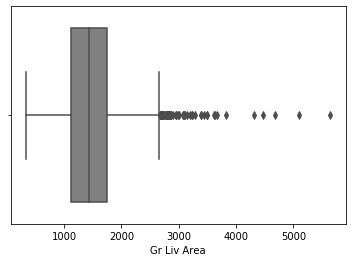

In [103]:
# Plot boxplot for Gr Liv Area
sns.boxplot(train_test['Gr Liv Area'],color='grey');

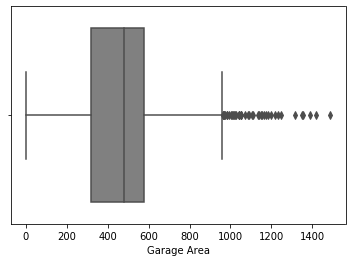

In [104]:
# Plot boxplot for Garage Area
sns.boxplot(train_test['Garage Area'],color='grey');

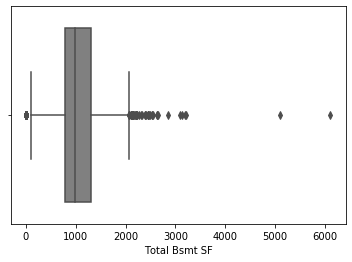

In [105]:
# Plot boxplot for Total Bsmt SF
sns.boxplot(train_test['Total Bsmt SF'],color='grey');

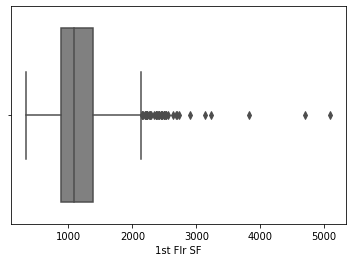

In [106]:
# Plot boxplot for '1st Flr SF'
sns.boxplot(train_test['1st Flr SF'],color='grey');

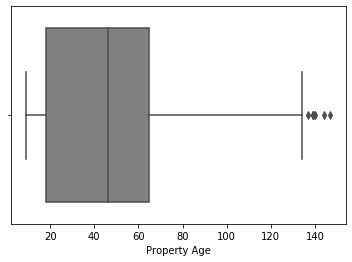

In [107]:
# Plot boxplot for Property Age
sns.boxplot(train_test['Property Age'],color='grey');

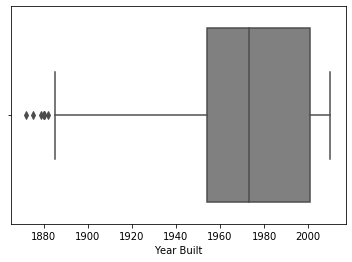

In [108]:
# Plot boxplot for Year Built
sns.boxplot(train_test['Year Built'],color='grey');

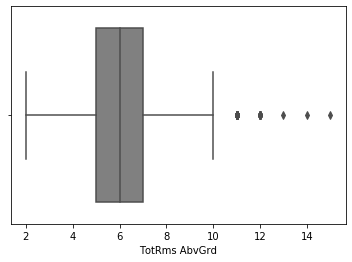

In [109]:
# Plot boxplot for TotRms AbvGrd
sns.boxplot(train_test['TotRms AbvGrd'],color='grey');

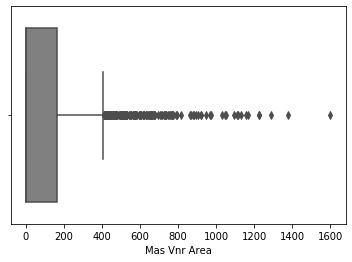

In [110]:
# Plot boxplot for Mas Vnr Area
sns.boxplot(train_test['Mas Vnr Area'],color='grey');

In [111]:
# Filter ['Gr Liv Area']>4500 to check for outliers
train_test.loc[train_test['Gr Liv Area']>4500,['Id','Gr Liv Area','Garage Area','Total Bsmt SF','1st Flr SF','Property Age','Year Built','TotRms AbvGrd','Mas Vnr Area','Fireplaces','train']]

,Id,Gr Liv Area,Garage Area,Total Bsmt SF,1st Flr SF,Property Age,Year Built,TotRms AbvGrd,Mas Vnr Area,Fireplaces,train
960,1499,5642,1418.0,6110.0,4692,11,2008,12,796.0,3,1
1884,2181,5095,1154.0,5095.0,5095,11,2008,15,1224.0,2,1
76,2182,4676,884.0,3138.0,3138,12,2007,11,762.0,1,0


In [112]:
# Filter ['Garage Area']>1100 to check for outliers
train_test.loc[train_test['Garage Area']>1100,['Id','Gr Liv Area','Garage Area','Total Bsmt SF','1st Flr SF','Property Age','Year Built','TotRms AbvGrd','Mas Vnr Area','Fireplaces','train']]

,Id,Gr Liv Area,Garage Area,Total Bsmt SF,1st Flr SF,Property Age,Year Built,TotRms AbvGrd,Mas Vnr Area,Fireplaces,train
81,367,2234,1166.0,2216.0,2234,11,2008,9,748.0,1,1
332,1060,2790,1150.0,1620.0,1632,14,2005,10,468.0,1,1
337,2283,1622,1356.0,1249.0,1622,58,1961,7,149.0,1,1
682,1053,2084,1220.0,2078.0,2084,12,2007,7,816.0,1,1
800,1702,2290,1174.0,2320.0,2290,12,2007,7,970.0,1,1
925,747,1072,1184.0,1072.0,1072,94,1925,5,0.0,0,1
960,1499,5642,1418.0,6110.0,4692,11,2008,12,796.0,3,1
1060,819,1680,1138.0,1555.0,1680,10,2009,8,242.0,1,1
1140,1853,2362,1105.0,1220.0,1220,21,1998,8,0.0,2,1
1158,1426,2276,1348.0,2271.0,2276,11,2008,7,554.0,2,1


In [113]:
# Filter ['Total Bsmt SF']>5000 to check for outliers
train_test.loc[train_test['Total Bsmt SF']>5000,['Id','Gr Liv Area','Garage Area','Total Bsmt SF','1st Flr SF','Property Age','Year Built','TotRms AbvGrd','Mas Vnr Area','Fireplaces','train']]

,Id,Gr Liv Area,Garage Area,Total Bsmt SF,1st Flr SF,Property Age,Year Built,TotRms AbvGrd,Mas Vnr Area,Fireplaces,train
960,1499,5642,1418.0,6110.0,4692,11,2008,12,796.0,3,1
1884,2181,5095,1154.0,5095.0,5095,11,2008,15,1224.0,2,1


In [114]:
# Filter ['1st Flr SF']>4000 to check for outliers
train_test.loc[train_test['1st Flr SF']>4000,['Id','Gr Liv Area','Garage Area','Total Bsmt SF','1st Flr SF','Property Age','Year Built','TotRms AbvGrd','Mas Vnr Area','Fireplaces','train']]

,Id,Gr Liv Area,Garage Area,Total Bsmt SF,1st Flr SF,Property Age,Year Built,TotRms AbvGrd,Mas Vnr Area,Fireplaces,train
960,1499,5642,1418.0,6110.0,4692,11,2008,12,796.0,3,1
1884,2181,5095,1154.0,5095.0,5095,11,2008,15,1224.0,2,1


In [115]:
# Filter ['Property Age']>140 to check for outliers
train_test.loc[train_test['Property Age']>140,['Id','Gr Liv Area','Garage Area','Total Bsmt SF','1st Flr SF','Property Age','Year Built','TotRms AbvGrd','Mas Vnr Area','Fireplaces','train']]

,Id,Gr Liv Area,Garage Area,Total Bsmt SF,1st Flr SF,Property Age,Year Built,TotRms AbvGrd,Mas Vnr Area,Fireplaces,train
136,216,1020,0.0,780.0,780,144,1875,6,0.0,0,1
951,1319,2358,0.0,684.0,938,147,1872,8,0.0,0,1


In [116]:
# Filter ['Year Built']<1880 to check for outliers
train_test.loc[train_test['Year Built']<1880,['Id','Gr Liv Area','Garage Area','Total Bsmt SF','1st Flr SF','Property Age','Year Built','TotRms AbvGrd','Mas Vnr Area','Fireplaces','train']]

,Id,Gr Liv Area,Garage Area,Total Bsmt SF,1st Flr SF,Property Age,Year Built,TotRms AbvGrd,Mas Vnr Area,Fireplaces,train
136,216,1020,0.0,780.0,780,144,1875,6,0.0,0,1
951,1319,2358,0.0,684.0,938,147,1872,8,0.0,0,1
1134,1998,2454,576.0,819.0,1312,140,1879,8,0.0,1,1


In [117]:
# Filter ['TotRms AbvGrd']>11 to check for outliers
train_test.loc[train_test['TotRms AbvGrd']>11,['Id','Gr Liv Area','Garage Area','Total Bsmt SF','1st Flr SF','Property Age','Year Built','TotRms AbvGrd','Mas Vnr Area','Fireplaces','train']]

,Id,Gr Liv Area,Garage Area,Total Bsmt SF,1st Flr SF,Property Age,Year Built,TotRms AbvGrd,Mas Vnr Area,Fireplaces,train
52,2351,2784,564.0,1392.0,1392,41,1978,12,184.0,2,1
78,136,2274,480.0,1105.0,1105,59,1960,12,361.0,0,1
194,670,2634,968.0,1248.0,1338,50,1969,12,368.0,0,1
562,187,2256,0.0,840.0,1128,109,1910,12,0.0,0,1
765,1862,2620,600.0,1361.0,1361,42,1977,12,1.0,1,1
823,16,3279,841.0,1650.0,1690,16,2003,12,603.0,1,1
858,2195,3395,0.0,1440.0,1440,105,1914,14,0.0,0,1
960,1499,5642,1418.0,6110.0,4692,11,2008,12,796.0,3,1
1035,2667,3608,840.0,1107.0,1518,127,1892,12,0.0,2,1
1256,813,2240,528.0,0.0,1120,40,1979,12,0.0,0,1


In [118]:
# Filter ['Mas Vnr Area']>1200 to check for outliers
train_test.loc[train_test['Mas Vnr Area']>1200,['Id','Gr Liv Area','Garage Area','Total Bsmt SF','1st Flr SF','Property Age','Year Built','TotRms AbvGrd','Mas Vnr Area','Fireplaces','train']]

,Id,Gr Liv Area,Garage Area,Total Bsmt SF,1st Flr SF,Property Age,Year Built,TotRms AbvGrd,Mas Vnr Area,Fireplaces,train
1409,1850,1950,576.0,975.0,975,22,1997,7,1600.0,1,1
1884,2181,5095,1154.0,5095.0,5095,11,2008,15,1224.0,2,1
116,2446,3627,807.0,1930.0,1831,24,1995,10,1378.0,1,0
260,2259,2279,461.0,585.0,2279,61,1958,7,1224.0,1,0
552,1099,2199,516.0,1173.0,1182,22,1997,9,1290.0,1,0


<font color=blue>Upon plotting box plot for, Gr Liv Area, Garage Area,Total Bsmt SF,1st Flr SF,Property Age,Year Built,TotRms AbvGrd and Mas Vnr Area, there are 2 rows appeared to be the outliers for most of the features.<br>
The 2 rows are with ID 2181,1499. Both are from Train dataset.

In [119]:
# Check shape
train_test.shape

(2929, 234)

In [120]:
# drop row with Id 2181
train_test.drop(train[train.Id==2181].index,inplace=True)

In [121]:
# drop row with Id 1499
train_test.drop(train[train.Id==1499].index,inplace=True)

In [122]:
# Check shape
train_test.shape

(2927, 234)

# Split train_test Dataset into train_final and test_final and Export to csv

In [123]:
# Check tail
train_test.tail()

,train,Id,PID,1st Flr SF,2nd Flr SF,3Ssn Porch,Bedroom AbvGr,Bsmt Cond,Bsmt Exposure,Bsmt Full Bath,Bsmt Half Bath,Bsmt Qual,Bsmt Unf SF,BsmtFin SF 1,BsmtFin SF 2,BsmtFin Type 1,BsmtFin Type 2,Central Air,Enclosed Porch,Exter Cond,Exter Qual,Fireplace Qu,Fireplaces,Full Bath,Garage Area,Garage Cars,Garage Cond,Garage Qual,Garage Yr Blt,Gr Liv Area,Half Bath,Heating QC,Kitchen AbvGr,Kitchen Qual,Lot Area,Lot Frontage,Low Qual Fin SF,MS SubClass,Mas Vnr Area,Misc Val,Mo Sold,Open Porch SF,Overall Cond,Overall Qual,Pool Area,Pool QC,Screen Porch,TotRms AbvGrd,Total Bsmt SF,Wood Deck SF,Year Built,Year Remod/Add,Property Age,Remodel Age,Remod/Add,Yr Sold,lot_config_CulDSac,lot_config_FR2,lot_config_FR3,lot_config_Inside,zon_C (all),zon_FV,zon_I (all),zon_RH,zon_RL,zon_RM,rd_access_Pave,al_access_Grvl,al_access_Pave,prop_shape_IR2,prop_shape_IR3,prop_shape_Reg,prop_flatness_HLS,prop_flatness_Low,prop_flatness_Lvl,utility_NoSeWa,utility_NoSewr,prop_slope_Mod,prop_slope_Sev,neigh_Blueste,neigh_BrDale,neigh_BrkSide,neigh_ClearCr,neigh_CollgCr,neigh_Crawfor,neigh_Edwards,neigh_Gilbert,neigh_Greens,neigh_GrnHill,neigh_IDOTRR,neigh_Landmrk,neigh_MeadowV,neigh_Mitchel,neigh_NAmes,neigh_NPkVill,neigh_NWAmes,neigh_NoRidge,neigh_NridgHt,neigh_OldTown,neigh_SWISU,neigh_Sawyer,neigh_SawyerW,neigh_Somerst,neigh_StoneBr,neigh_Timber,neigh_Veenker,proxi_1_Feedr,proxi_1_Norm,proxi_1_PosA,proxi_1_PosN,proxi_1_RRAe,proxi_1_RRAn,proxi_1_RRNe,proxi_1_RRNn,promxi_2_Feedr,promxi_2_Norm,promxi_2_PosA,promxi_2_PosN,promxi_2_RRAe,promxi_2_RRAn,promxi_2_RRNn,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,hse_style_1.5Unf,hse_style_1Story,hse_style_2.5Fin,hse_style_2.5Unf,hse_style_2Story,hse_style_SFoyer,hse_style_SLvl,r_style_Gable,r_style_Gambrel,r_style_Hip,r_style_Mansard,r_style_Shed,r_mat_CompShg,r_mat_Membran,r_mat_Metal,r_mat_Roll,r_mat_Tar&Grv,r_mat_WdShake,r_mat_WdShngl,ex_1_AsphShn,ex_1_BrkComm,ex_1_BrkFace,ex_1_CBlock,ex_1_CemntBd,ex_1_HdBoard,ex_1_ImStucc,ex_1_MetalSd,ex_1_Plywood,ex_1_PreCast,ex_1_Stone,ex_1_Stucco,ex_1_VinylSd,ex_1_Wd Sdng,ex_1_WdShing,ex_2_AsphShn,ex_2_Brk Cmn,ex_2_BrkFace,ex_2_CBlock,ex_2_CmentBd,ex_2_HdBoard,ex_2_ImStucc,ex_2_MetalSd,ex_2_Other,ex_2_Plywood,ex_2_PreCast,ex_2_Stone,ex_2_Stucco,ex_2_VinylSd,ex_2_Wd Sdng,ex_2_Wd Shng,mas_type_BrkFace,mas_type_CBlock,mas_type_None,mas_type_Stone,found__CBlock,found__PConc,found__Slab,found__Stone,found__Wood,heat__GasA,heat__GasW,heat__Grav,heat__OthW,heat__Wall,ele__FuseF,ele__FuseP,ele__Mix,ele__SBrkr,funct_Maj2,funct_Min1,funct_Min2,funct_Mod,funct_Sal,funct_Sev,funct_Typ,garage_ty_2Types,garage_ty_Attchd,garage_ty_Basment,garage_ty_BuiltIn,garage_ty_CarPort,garage_ty_Detchd,garage_fin_Fin,garage_fin_RFn,garage_fin_Unf,paved_dr_P,paved_dr_Y,fence_GdPrv,fence_GdWo,fence_MnPrv,fence_MnWw,misc_Elev,misc_Gar2,misc_Othr,misc_Shed,misc_TenC,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_VWD,sale_type_WD,Overall Qual*Exter Qual,Lot Area*Remodel Age,Property Age*Lot Area,Gr Liv Area*TotRms AbvGrd,SalePrice
874,0,1662,527377110,1084,793,0,4,3,1,1.0,0.0,3,0.0,931.0,153.0,5,2,1,0,3,3,3,1,2,488.0,2.0,3,3,1974.0,1877,1,3,1,3,8000,80.0,0,60,0.0,0,11,96,6,6,0,0,0,8,1084.0,0,1974,1974,45,45,0,2007,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,18,360000,360000,15016,NaN
875,0,1234,535126140,1104,884,0,4,3,1,0.0,0.0,3,529.0,575.0,0.0,4,1,1,0,4,4,4,1,2,480.0,2.0,3,3,1966.0,1988,1,5,1,4,14670,90.0,0,60,410.0,0,8,230,7,6,0,0,0,9,1104.0,0,1966,1999,53,20,1,2008,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0

Extract train data set and save as train_final csv file.

In [124]:
# check train data set shape
train[train['train']==1].shape

(2050, 82)

In [125]:
# Check train_test shape
train_test[train_test['train']==1].shape

(2048, 234)

In [126]:
# Extract train data set where 'train' column value=1
train_final=train_test[train_test['train']==1]

In [127]:
# check head to ensure 'train' column value =1
train_final.head()

,train,Id,PID,1st Flr SF,2nd Flr SF,3Ssn Porch,Bedroom AbvGr,Bsmt Cond,Bsmt Exposure,Bsmt Full Bath,Bsmt Half Bath,Bsmt Qual,Bsmt Unf SF,BsmtFin SF 1,BsmtFin SF 2,BsmtFin Type 1,BsmtFin Type 2,Central Air,Enclosed Porch,Exter Cond,Exter Qual,Fireplace Qu,Fireplaces,Full Bath,Garage Area,Garage Cars,Garage Cond,Garage Qual,Garage Yr Blt,Gr Liv Area,Half Bath,Heating QC,Kitchen AbvGr,Kitchen Qual,Lot Area,Lot Frontage,Low Qual Fin SF,MS SubClass,Mas Vnr Area,Misc Val,Mo Sold,Open Porch SF,Overall Cond,Overall Qual,Pool Area,Pool QC,Screen Porch,TotRms AbvGrd,Total Bsmt SF,Wood Deck SF,Year Built,Year Remod/Add,Property Age,Remodel Age,Remod/Add,Yr Sold,lot_config_CulDSac,lot_config_FR2,lot_config_FR3,lot_config_Inside,zon_C (all),zon_FV,zon_I (all),zon_RH,zon_RL,zon_RM,rd_access_Pave,al_access_Grvl,al_access_Pave,prop_shape_IR2,prop_shape_IR3,prop_shape_Reg,prop_flatness_HLS,prop_flatness_Low,prop_flatness_Lvl,utility_NoSeWa,utility_NoSewr,prop_slope_Mod,prop_slope_Sev,neigh_Blueste,neigh_BrDale,neigh_BrkSide,neigh_ClearCr,neigh_CollgCr,neigh_Crawfor,neigh_Edwards,neigh_Gilbert,neigh_Greens,neigh_GrnHill,neigh_IDOTRR,neigh_Landmrk,neigh_MeadowV,neigh_Mitchel,neigh_NAmes,neigh_NPkVill,neigh_NWAmes,neigh_NoRidge,neigh_NridgHt,neigh_OldTown,neigh_SWISU,neigh_Sawyer,neigh_SawyerW,neigh_Somerst,neigh_StoneBr,neigh_Timber,neigh_Veenker,proxi_1_Feedr,proxi_1_Norm,proxi_1_PosA,proxi_1_PosN,proxi_1_RRAe,proxi_1_RRAn,proxi_1_RRNe,proxi_1_RRNn,promxi_2_Feedr,promxi_2_Norm,promxi_2_PosA,promxi_2_PosN,promxi_2_RRAe,promxi_2_RRAn,promxi_2_RRNn,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,hse_style_1.5Unf,hse_style_1Story,hse_style_2.5Fin,hse_style_2.5Unf,hse_style_2Story,hse_style_SFoyer,hse_style_SLvl,r_style_Gable,r_style_Gambrel,r_style_Hip,r_style_Mansard,r_style_Shed,r_mat_CompShg,r_mat_Membran,r_mat_Metal,r_mat_Roll,r_mat_Tar&Grv,r_mat_WdShake,r_mat_WdShngl,ex_1_AsphShn,ex_1_BrkComm,ex_1_BrkFace,ex_1_CBlock,ex_1_CemntBd,ex_1_HdBoard,ex_1_ImStucc,ex_1_MetalSd,ex_1_Plywood,ex_1_PreCast,ex_1_Stone,ex_1_Stucco,ex_1_VinylSd,ex_1_Wd Sdng,ex_1_WdShing,ex_2_AsphShn,ex_2_Brk Cmn,ex_2_BrkFace,ex_2_CBlock,ex_2_CmentBd,ex_2_HdBoard,ex_2_ImStucc,ex_2_MetalSd,ex_2_Other,ex_2_Plywood,ex_2_PreCast,ex_2_Stone,ex_2_Stucco,ex_2_VinylSd,ex_2_Wd Sdng,ex_2_Wd Shng,mas_type_BrkFace,mas_type_CBlock,mas_type_None,mas_type_Stone,found__CBlock,found__PConc,found__Slab,found__Stone,found__Wood,heat__GasA,heat__GasW,heat__Grav,heat__OthW,heat__Wall,ele__FuseF,ele__FuseP,ele__Mix,ele__SBrkr,funct_Maj2,funct_Min1,funct_Min2,funct_Mod,funct_Sal,funct_Sev,funct_Typ,garage_ty_2Types,garage_ty_Attchd,garage_ty_Basment,garage_ty_BuiltIn,garage_ty_CarPort,garage_ty_Detchd,garage_fin_Fin,garage_fin_RFn,garage_fin_Unf,paved_dr_P,paved_dr_Y,fence_GdPrv,fence_GdWo,fence_MnPrv,fence_MnWw,misc_Elev,misc_Gar2,misc_Othr,misc_Shed,misc_TenC,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_VWD,sale_type_WD,Overall Qual*Exter Qual,Lot Area*Remodel Age,Property Age*Lot Area,Gr Liv Area*TotRms AbvGrd,SalePrice
0,1,109,533352170,725,754,0,3,3,1,0.0,0.0,3,192.0,533.0,0.0,6,1,1,0,3,4,0,0,2,475.0,2.0,3,3,1976.0,1479,1,5,1,4,13517,68.0,0,60,289.0,0,3,44,8,6,0,0,0,6,725.0,0,1976,2005,43,14,1,2010,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,24,189238,581231,8874,130500.0
1,1,544,531379050,913,1209,0,4,3,1,1.0,0.0,4,276.0,637.0,0.0,6,1,1,0,3,4,3,1,2,559.0,2.0,3,3,1997.0,2122,1,5,1,4,11492,43.0,0,60,132.0,0,4,74,5,7,0,0,0,8,913.0,0,1996,1997,23,22,1,2009,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0

In [128]:
# check tail to ensure 'train' column value =1
train_final.tail()

,train,Id,PID,1st Flr SF,2nd Flr SF,3Ssn Porch,Bedroom AbvGr,Bsmt Cond,Bsmt Exposure,Bsmt Full Bath,Bsmt Half Bath,Bsmt Qual,Bsmt Unf SF,BsmtFin SF 1,BsmtFin SF 2,BsmtFin Type 1,BsmtFin Type 2,Central Air,Enclosed Porch,Exter Cond,Exter Qual,Fireplace Qu,Fireplaces,Full Bath,Garage Area,Garage Cars,Garage Cond,Garage Qual,Garage Yr Blt,Gr Liv Area,Half Bath,Heating QC,Kitchen AbvGr,Kitchen Qual,Lot Area,Lot Frontage,Low Qual Fin SF,MS SubClass,Mas Vnr Area,Misc Val,Mo Sold,Open Porch SF,Overall Cond,Overall Qual,Pool Area,Pool QC,Screen Porch,TotRms AbvGrd,Total Bsmt SF,Wood Deck SF,Year Built,Year Remod/Add,Property Age,Remodel Age,Remod/Add,Yr Sold,lot_config_CulDSac,lot_config_FR2,lot_config_FR3,lot_config_Inside,zon_C (all),zon_FV,zon_I (all),zon_RH,zon_RL,zon_RM,rd_access_Pave,al_access_Grvl,al_access_Pave,prop_shape_IR2,prop_shape_IR3,prop_shape_Reg,prop_flatness_HLS,prop_flatness_Low,prop_flatness_Lvl,utility_NoSeWa,utility_NoSewr,prop_slope_Mod,prop_slope_Sev,neigh_Blueste,neigh_BrDale,neigh_BrkSide,neigh_ClearCr,neigh_CollgCr,neigh_Crawfor,neigh_Edwards,neigh_Gilbert,neigh_Greens,neigh_GrnHill,neigh_IDOTRR,neigh_Landmrk,neigh_MeadowV,neigh_Mitchel,neigh_NAmes,neigh_NPkVill,neigh_NWAmes,neigh_NoRidge,neigh_NridgHt,neigh_OldTown,neigh_SWISU,neigh_Sawyer,neigh_SawyerW,neigh_Somerst,neigh_StoneBr,neigh_Timber,neigh_Veenker,proxi_1_Feedr,proxi_1_Norm,proxi_1_PosA,proxi_1_PosN,proxi_1_RRAe,proxi_1_RRAn,proxi_1_RRNe,proxi_1_RRNn,promxi_2_Feedr,promxi_2_Norm,promxi_2_PosA,promxi_2_PosN,promxi_2_RRAe,promxi_2_RRAn,promxi_2_RRNn,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,hse_style_1.5Unf,hse_style_1Story,hse_style_2.5Fin,hse_style_2.5Unf,hse_style_2Story,hse_style_SFoyer,hse_style_SLvl,r_style_Gable,r_style_Gambrel,r_style_Hip,r_style_Mansard,r_style_Shed,r_mat_CompShg,r_mat_Membran,r_mat_Metal,r_mat_Roll,r_mat_Tar&Grv,r_mat_WdShake,r_mat_WdShngl,ex_1_AsphShn,ex_1_BrkComm,ex_1_BrkFace,ex_1_CBlock,ex_1_CemntBd,ex_1_HdBoard,ex_1_ImStucc,ex_1_MetalSd,ex_1_Plywood,ex_1_PreCast,ex_1_Stone,ex_1_Stucco,ex_1_VinylSd,ex_1_Wd Sdng,ex_1_WdShing,ex_2_AsphShn,ex_2_Brk Cmn,ex_2_BrkFace,ex_2_CBlock,ex_2_CmentBd,ex_2_HdBoard,ex_2_ImStucc,ex_2_MetalSd,ex_2_Other,ex_2_Plywood,ex_2_PreCast,ex_2_Stone,ex_2_Stucco,ex_2_VinylSd,ex_2_Wd Sdng,ex_2_Wd Shng,mas_type_BrkFace,mas_type_CBlock,mas_type_None,mas_type_Stone,found__CBlock,found__PConc,found__Slab,found__Stone,found__Wood,heat__GasA,heat__GasW,heat__Grav,heat__OthW,heat__Wall,ele__FuseF,ele__FuseP,ele__Mix,ele__SBrkr,funct_Maj2,funct_Min1,funct_Min2,funct_Mod,funct_Sal,funct_Sev,funct_Typ,garage_ty_2Types,garage_ty_Attchd,garage_ty_Basment,garage_ty_BuiltIn,garage_ty_CarPort,garage_ty_Detchd,garage_fin_Fin,garage_fin_RFn,garage_fin_Unf,paved_dr_P,paved_dr_Y,fence_GdPrv,fence_GdWo,fence_MnPrv,fence_MnWw,misc_Elev,misc_Gar2,misc_Othr,misc_Shed,misc_TenC,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_VWD,sale_type_WD,Overall Qual*Exter Qual,Lot Area*Remodel Age,Property Age*Lot Area,Gr Liv Area*TotRms AbvGrd,SalePrice
2045,1,1587,921126030,1728,0,0,3,3,3,1.0,0.0,4,873.0,1011.0,0.0,6,1,1,0,3,4,4,1,2,520.0,2.0,3,3,2007.0,1728,0,5,1,4,11449,79.0,0,20,0.0,0,1,276,5,8,0,0,0,7,1884.0,0,2007,2007,12,12,0,2008,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,32,137388,137388,12096,298751.0
2046,1,785,905377130,861,0,0,1,3,1,0.0,0.0,3,599.0,262.0,0.0,4,1,1,0,3,3,0,0,1,539.0,2.0,3,3,1961.0,861,0,5,1,3,12342,68.0,0,30,0.0,0,3,0,5,4,0,0,0,4,861.0,158,1940,1950,79,69,1,2009,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,

In [129]:
# check shape
train_final.shape

(2048, 234)

In [130]:
# Delete the 'train' column created earlier
del train_final['train']

In [131]:
# Check shape
train_final.shape

(2048, 233)

In [132]:
# Check head
train_final.head(2)

,Id,PID,1st Flr SF,2nd Flr SF,3Ssn Porch,Bedroom AbvGr,Bsmt Cond,Bsmt Exposure,Bsmt Full Bath,Bsmt Half Bath,Bsmt Qual,Bsmt Unf SF,BsmtFin SF 1,BsmtFin SF 2,BsmtFin Type 1,BsmtFin Type 2,Central Air,Enclosed Porch,Exter Cond,Exter Qual,Fireplace Qu,Fireplaces,Full Bath,Garage Area,Garage Cars,Garage Cond,Garage Qual,Garage Yr Blt,Gr Liv Area,Half Bath,Heating QC,Kitchen AbvGr,Kitchen Qual,Lot Area,Lot Frontage,Low Qual Fin SF,MS SubClass,Mas Vnr Area,Misc Val,Mo Sold,Open Porch SF,Overall Cond,Overall Qual,Pool Area,Pool QC,Screen Porch,TotRms AbvGrd,Total Bsmt SF,Wood Deck SF,Year Built,Year Remod/Add,Property Age,Remodel Age,Remod/Add,Yr Sold,lot_config_CulDSac,lot_config_FR2,lot_config_FR3,lot_config_Inside,zon_C (all),zon_FV,zon_I (all),zon_RH,zon_RL,zon_RM,rd_access_Pave,al_access_Grvl,al_access_Pave,prop_shape_IR2,prop_shape_IR3,prop_shape_Reg,prop_flatness_HLS,prop_flatness_Low,prop_flatness_Lvl,utility_NoSeWa,utility_NoSewr,prop_slope_Mod,prop_slope_Sev,neigh_Blueste,neigh_BrDale,neigh_BrkSide,neigh_ClearCr,neigh_CollgCr,neigh_Crawfor,neigh_Edwards,neigh_Gilbert,neigh_Greens,neigh_GrnHill,neigh_IDOTRR,neigh_Landmrk,neigh_MeadowV,neigh_Mitchel,neigh_NAmes,neigh_NPkVill,neigh_NWAmes,neigh_NoRidge,neigh_NridgHt,neigh_OldTown,neigh_SWISU,neigh_Sawyer,neigh_SawyerW,neigh_Somerst,neigh_StoneBr,neigh_Timber,neigh_Veenker,proxi_1_Feedr,proxi_1_Norm,proxi_1_PosA,proxi_1_PosN,proxi_1_RRAe,proxi_1_RRAn,proxi_1_RRNe,proxi_1_RRNn,promxi_2_Feedr,promxi_2_Norm,promxi_2_PosA,promxi_2_PosN,promxi_2_RRAe,promxi_2_RRAn,promxi_2_RRNn,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,hse_style_1.5Unf,hse_style_1Story,hse_style_2.5Fin,hse_style_2.5Unf,hse_style_2Story,hse_style_SFoyer,hse_style_SLvl,r_style_Gable,r_style_Gambrel,r_style_Hip,r_style_Mansard,r_style_Shed,r_mat_CompShg,r_mat_Membran,r_mat_Metal,r_mat_Roll,r_mat_Tar&Grv,r_mat_WdShake,r_mat_WdShngl,ex_1_AsphShn,ex_1_BrkComm,ex_1_BrkFace,ex_1_CBlock,ex_1_CemntBd,ex_1_HdBoard,ex_1_ImStucc,ex_1_MetalSd,ex_1_Plywood,ex_1_PreCast,ex_1_Stone,ex_1_Stucco,ex_1_VinylSd,ex_1_Wd Sdng,ex_1_WdShing,ex_2_AsphShn,ex_2_Brk Cmn,ex_2_BrkFace,ex_2_CBlock,ex_2_CmentBd,ex_2_HdBoard,ex_2_ImStucc,ex_2_MetalSd,ex_2_Other,ex_2_Plywood,ex_2_PreCast,ex_2_Stone,ex_2_Stucco,ex_2_VinylSd,ex_2_Wd Sdng,ex_2_Wd Shng,mas_type_BrkFace,mas_type_CBlock,mas_type_None,mas_type_Stone,found__CBlock,found__PConc,found__Slab,found__Stone,found__Wood,heat__GasA,heat__GasW,heat__Grav,heat__OthW,heat__Wall,ele__FuseF,ele__FuseP,ele__Mix,ele__SBrkr,funct_Maj2,funct_Min1,funct_Min2,funct_Mod,funct_Sal,funct_Sev,funct_Typ,garage_ty_2Types,garage_ty_Attchd,garage_ty_Basment,garage_ty_BuiltIn,garage_ty_CarPort,garage_ty_Detchd,garage_fin_Fin,garage_fin_RFn,garage_fin_Unf,paved_dr_P,paved_dr_Y,fence_GdPrv,fence_GdWo,fence_MnPrv,fence_MnWw,misc_Elev,misc_Gar2,misc_Othr,misc_Shed,misc_TenC,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_VWD,sale_type_WD,Overall Qual*Exter Qual,Lot Area*Remodel Age,Property Age*Lot Area,Gr Liv Area*TotRms AbvGrd,SalePrice
0,109,533352170,725,754,0,3,3,1,0.0,0.0,3,192.0,533.0,0.0,6,1,1,0,3,4,0,0,2,475.0,2.0,3,3,1976.0,1479,1,5,1,4,13517,68.0,0,60,289.0,0,3,44,8,6,0,0,0,6,725.0,0,1976,2005,43,14,1,2010,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,24,189238,581231,8874,130500.0
1,544,531379050,913,1209,0,4,3,1,1.0,0.0,4,276.0,637.0,0.0,6,1,1,0,3,4,3,1,2,559.0,2.0,3,3,1997.0,2122,1,5,1,4,11492,43.0,0,60,132.0,0,4,74,5,7,0,0,0,8,913.0,0,1996,1997,23,22,1,2009,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0

In [133]:
# Export train_final to csv file.
# train_final.to_csv('train_final.csv',index=False)

Extract test data set and save as test_final csv file.

In [134]:
# check test data set shape
test_clean[test_clean['train']==0].shape

(879, 81)

In [135]:
# Check train_test shape
train_test[train_test['train']==0].shape

(879, 234)

In [136]:
# Extract test data set where 'train' column value=0
test_final=train_test[train_test['train']==0]

In [137]:
# check shape
test_final.shape

(879, 234)

In [138]:
# Delete the 'train' column created earlier
del test_final['train']

In [139]:
# Check shape
test_final.shape

(879, 233)

In [140]:
# Check head
test_final.head(2)

,Id,PID,1st Flr SF,2nd Flr SF,3Ssn Porch,Bedroom AbvGr,Bsmt Cond,Bsmt Exposure,Bsmt Full Bath,Bsmt Half Bath,Bsmt Qual,Bsmt Unf SF,BsmtFin SF 1,BsmtFin SF 2,BsmtFin Type 1,BsmtFin Type 2,Central Air,Enclosed Porch,Exter Cond,Exter Qual,Fireplace Qu,Fireplaces,Full Bath,Garage Area,Garage Cars,Garage Cond,Garage Qual,Garage Yr Blt,Gr Liv Area,Half Bath,Heating QC,Kitchen AbvGr,Kitchen Qual,Lot Area,Lot Frontage,Low Qual Fin SF,MS SubClass,Mas Vnr Area,Misc Val,Mo Sold,Open Porch SF,Overall Cond,Overall Qual,Pool Area,Pool QC,Screen Porch,TotRms AbvGrd,Total Bsmt SF,Wood Deck SF,Year Built,Year Remod/Add,Property Age,Remodel Age,Remod/Add,Yr Sold,lot_config_CulDSac,lot_config_FR2,lot_config_FR3,lot_config_Inside,zon_C (all),zon_FV,zon_I (all),zon_RH,zon_RL,zon_RM,rd_access_Pave,al_access_Grvl,al_access_Pave,prop_shape_IR2,prop_shape_IR3,prop_shape_Reg,prop_flatness_HLS,prop_flatness_Low,prop_flatness_Lvl,utility_NoSeWa,utility_NoSewr,prop_slope_Mod,prop_slope_Sev,neigh_Blueste,neigh_BrDale,neigh_BrkSide,neigh_ClearCr,neigh_CollgCr,neigh_Crawfor,neigh_Edwards,neigh_Gilbert,neigh_Greens,neigh_GrnHill,neigh_IDOTRR,neigh_Landmrk,neigh_MeadowV,neigh_Mitchel,neigh_NAmes,neigh_NPkVill,neigh_NWAmes,neigh_NoRidge,neigh_NridgHt,neigh_OldTown,neigh_SWISU,neigh_Sawyer,neigh_SawyerW,neigh_Somerst,neigh_StoneBr,neigh_Timber,neigh_Veenker,proxi_1_Feedr,proxi_1_Norm,proxi_1_PosA,proxi_1_PosN,proxi_1_RRAe,proxi_1_RRAn,proxi_1_RRNe,proxi_1_RRNn,promxi_2_Feedr,promxi_2_Norm,promxi_2_PosA,promxi_2_PosN,promxi_2_RRAe,promxi_2_RRAn,promxi_2_RRNn,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,hse_style_1.5Unf,hse_style_1Story,hse_style_2.5Fin,hse_style_2.5Unf,hse_style_2Story,hse_style_SFoyer,hse_style_SLvl,r_style_Gable,r_style_Gambrel,r_style_Hip,r_style_Mansard,r_style_Shed,r_mat_CompShg,r_mat_Membran,r_mat_Metal,r_mat_Roll,r_mat_Tar&Grv,r_mat_WdShake,r_mat_WdShngl,ex_1_AsphShn,ex_1_BrkComm,ex_1_BrkFace,ex_1_CBlock,ex_1_CemntBd,ex_1_HdBoard,ex_1_ImStucc,ex_1_MetalSd,ex_1_Plywood,ex_1_PreCast,ex_1_Stone,ex_1_Stucco,ex_1_VinylSd,ex_1_Wd Sdng,ex_1_WdShing,ex_2_AsphShn,ex_2_Brk Cmn,ex_2_BrkFace,ex_2_CBlock,ex_2_CmentBd,ex_2_HdBoard,ex_2_ImStucc,ex_2_MetalSd,ex_2_Other,ex_2_Plywood,ex_2_PreCast,ex_2_Stone,ex_2_Stucco,ex_2_VinylSd,ex_2_Wd Sdng,ex_2_Wd Shng,mas_type_BrkFace,mas_type_CBlock,mas_type_None,mas_type_Stone,found__CBlock,found__PConc,found__Slab,found__Stone,found__Wood,heat__GasA,heat__GasW,heat__Grav,heat__OthW,heat__Wall,ele__FuseF,ele__FuseP,ele__Mix,ele__SBrkr,funct_Maj2,funct_Min1,funct_Min2,funct_Mod,funct_Sal,funct_Sev,funct_Typ,garage_ty_2Types,garage_ty_Attchd,garage_ty_Basment,garage_ty_BuiltIn,garage_ty_CarPort,garage_ty_Detchd,garage_fin_Fin,garage_fin_RFn,garage_fin_Unf,paved_dr_P,paved_dr_Y,fence_GdPrv,fence_GdWo,fence_MnPrv,fence_MnWw,misc_Elev,misc_Gar2,misc_Othr,misc_Shed,misc_TenC,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_VWD,sale_type_WD,Overall Qual*Exter Qual,Lot Area*Remodel Age,Property Age*Lot Area,Gr Liv Area*TotRms AbvGrd,SalePrice
0,2658,902301120,908,1020,0,4,3,1,0.0,0.0,2,1020.0,0.0,0.0,1,1,0,112,2,3,0,0,2,440.0,1.0,1,1,1910.0,1928,0,4,2,2,9142,69.0,0,190,0.0,0,4,60,8,6,0,0,0,9,1020.0,0,1910,1950,109,69,1,2006,0,0,0,1,0,0,0,0,0,1,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,18,630798,996478,17352,NaN
1,2718,905108090,1967,0,0,6,3,1,0.0,0.0,4,1967.0,0.0,0.0,1,1,1,0,3,3,0,0,2,580.0,2.0,3,3,1977.0,1967,0,3,2,3,9662,68.0,0,90,0.0,0,8,0,4,5,0,0,0,10,1967.0,170,1977,1977,42,42,0,2006,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,

In [141]:
# Export test_final to csv file.
#test_final.to_csv('test_final.csv',index=False)

# Feature Selection: Filtering method


In [142]:
# Find out correlation in train_final databse
train_final_corr=train_final.corr()

In [143]:
# fix, ax = plt.subplots(figsize=(40,20))
# mask = np.zeros_like(train_final_corr, dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True
# ax = sns.heatmap(train_final_corr, mask=mask, cmap='YlGnBu',ax=ax,annot=True,fmt='.1f',annot_kws={"size":18})
# ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14)
# ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14);

<font color=blue>
Shortlist a top 20 features that has strong correlation with SalePrice by filtering correlation > 0.5.<br>
Amongst the shortlisted features, check for feature's outliers by ploting box plot

In [144]:
# Correlation with output variable
cor_target = abs(train_final_corr["SalePrice"])

In [145]:
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5].sort_values(ascending=False)
print(relevant_features.count())
relevant_features

21


SalePrice                    1.000000
Overall Qual*Exter Qual      0.831130
Overall Qual                 0.802145
Exter Qual                   0.713830
Gr Liv Area                  0.710394
Kitchen Qual                 0.693803
Garage Area                  0.653946
Total Bsmt SF                0.651207
Garage Cars                  0.648313
1st Flr SF                   0.632308
Gr Liv Area*TotRms AbvGrd    0.630515
Bsmt Qual                    0.613037
Year Built                   0.572300
Property Age                 0.572300
Remodel Age                  0.550952
Year Remod/Add               0.550952
Fireplace Qu                 0.539521
Full Bath                    0.538515
found__PConc                 0.529523
Mas Vnr Area                 0.506247
TotRms AbvGrd                0.506078
Name: SalePrice, dtype: float64

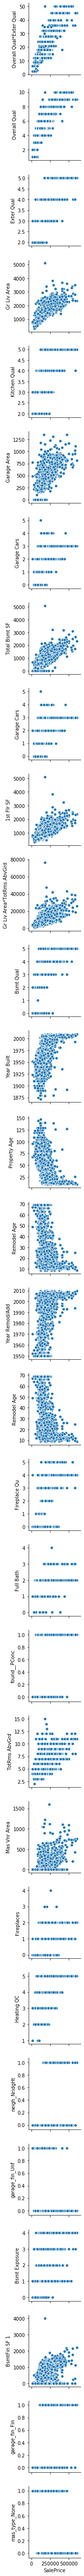

In [146]:
# Plot pairplot between selected features and target 'SalePrice'
sns.pairplot(train_final,y_vars=['Overall Qual*Exter Qual','Overall Qual','Exter Qual','Gr Liv Area','Kitchen Qual','Garage Area','Garage Cars',
                                'Total Bsmt SF','Garage Cars','1st Flr SF','Gr Liv Area*TotRms AbvGrd','Bsmt Qual','Year Built','Property Age','Remodel Age','Year Remod/Add',
                                 'Remodel Age','Fireplace Qu','Full Bath','found__PConc','TotRms AbvGrd','Mas Vnr Area',
                                'Fireplaces','Heating QC','neigh_NridgHt','garage_fin_Unf','Bsmt Exposure','BsmtFin SF 1',
                                'garage_fin_Fin','mas_type_None'],x_vars=['SalePrice']);

# Modelling with Selected Features Based on Correlation with Target.

In [147]:
relevant_features

SalePrice                    1.000000
Overall Qual*Exter Qual      0.831130
Overall Qual                 0.802145
Exter Qual                   0.713830
Gr Liv Area                  0.710394
Kitchen Qual                 0.693803
Garage Area                  0.653946
Total Bsmt SF                0.651207
Garage Cars                  0.648313
1st Flr SF                   0.632308
Gr Liv Area*TotRms AbvGrd    0.630515
Bsmt Qual                    0.613037
Year Built                   0.572300
Property Age                 0.572300
Remodel Age                  0.550952
Year Remod/Add               0.550952
Fireplace Qu                 0.539521
Full Bath                    0.538515
found__PConc                 0.529523
Mas Vnr Area                 0.506247
TotRms AbvGrd                0.506078
Name: SalePrice, dtype: float64

1.Create our features matrix (X) and target vector (y)

In [148]:
# Create our features matrix (X) and target vector (y)
features=['Overall Qual*Exter Qual','Overall Qual','Exter Qual','Gr Liv Area','Kitchen Qual','Garage Area','Total Bsmt SF','Garage Cars','1st Flr SF','Gr Liv Area*TotRms AbvGrd','Bsmt Qual','Property Age','Year Built','Year Remod/Add','Remodel Age','Fireplace Qu','Full Bath','found__PConc','Mas Vnr Area','TotRms AbvGrd']
Xs=train_final[features]
ys=train_final['SalePrice']

In [149]:
# Check Xs table
Xs.head()

,Overall Qual*Exter Qual,Overall Qual,Exter Qual,Gr Liv Area,Kitchen Qual,Garage Area,Total Bsmt SF,Garage Cars,1st Flr SF,Gr Liv Area*TotRms AbvGrd,Bsmt Qual,Property Age,Year Built,Year Remod/Add,Remodel Age,Fireplace Qu,Full Bath,found__PConc,Mas Vnr Area,TotRms AbvGrd
0,24,6,4,1479,4,475.0,725.0,2.0,725,8874,3,43,1976,2005,14,0,2,0,289.0,6
1,28,7,4,2122,4,559.0,913.0,2.0,913,16976,4,23,1996,1997,22,3,2,1,132.0,8
2,15,5,3,1057,4,246.0,1057.0,1.0,1057,5285,3,66,1953,2007,12,0,1,0,0.0,5
3,15,5,3,1444,3,400.0,384.0,2.0,744,10108,4,13,2006,2007,12,0,2,1,0.0,7
4,18,6,3,1445,3,484.0,676.0,2.0,831,8670,2,119,1900,1993,26,0,2,1,0.0,6


In [150]:
# Check ys table
ys.head()

0    130500.0
1    220000.0
2    109000.0
3    174000.0
4    138500.0
Name: SalePrice, dtype: float64

In [151]:
# Check Xs shape & ys shape
print('Xs shape :',Xs.shape)
print('ys shape :',ys.shape)

Xs shape : (2048, 20)
ys shape : (2048,)


2.Train-Test-Split

In [152]:
# Train Test Split to Split the data into train and test set
Xs_train,Xs_test,ys_train,ys_test=train_test_split(Xs,ys,random_state=42)

In [153]:
# Check Xs_train, Xs_test, ys_train,ys_test shape
print('Xs_train Shape',Xs_train.shape)
print('ys_train Shape',ys_train.shape)
print('Xs_test Shape',Xs_test.shape)
print('ys_test Shape',ys_test.shape)

Xs_train Shape (1536, 20)
ys_train Shape (1536,)
Xs_test Shape (512, 20)
ys_test Shape (512,)


3. Scaling

In [154]:
# Scaling

# 1. initiate object 
ss=StandardScaler()

# 2. fit to get mean & std, 
ss.fit(Xs_train)

# 3. transform to standardized form, # there's a fit.train bit normually used for test data
Xs_train_ss=ss.transform(Xs_train)

# 4. need to scale both train & test so that test is scaled based on training data
Xs_test_ss=ss.transform(Xs_test)

4. Instantiate models

In [155]:
# Instantiate our models

# Instantiate Linear Regression model
lrs=LinearRegression()

# Instantiate Ridge Regression model
ridges=RidgeCV(alphas=np.linspace(.1,10,100))

# Instantiate Lasso Regression model
lassos_alphas = np.arange(0.001, 0.15, 0.0025)
lassos=LassoCV(alphas=lassos_alphas,cv=10)

5.Cross Validation

In [156]:
# Cross validation to evaluate all three models using.

# Get accuracy score for Linear Regression
lrs_scores=cross_val_score(lrs,Xs_train,ys_train,cv=10)
print('lrs_scores :',lrs_scores.mean())

# Get accuracy score for Ridge Regression
ridges_scores=cross_val_score(ridges,Xs_train,ys_train,cv=10)
print('ridges_scores :',ridges_scores.mean())

# Get accuracy score for Lsso Regression
lassos_scores=cross_val_score(lassos,Xs_train,ys_train,cv=10)
print('lassos_scores :',lassos_scores.mean())

lrs_scores : 0.805876805877805
ridges_scores : 0.8058062476144789


C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 292649754878.3895, tolerance: 738215094.9334415
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 334953334338.485, tolerance: 702588628.6303537
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 253386410071.17957, tolerance: 721490177.8526733
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want t

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 446609148485.65894, tolerance: 772582710.7516016
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 378138574450.65356, tolerance: 784890976.4550285
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 406261470422.6817, tolerance: 845305229.0660832
  positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the n

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 378349324294.8772, tolerance: 784217637.7147019
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 346118316391.8491, tolerance: 770031819.387685
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 351240701266.7081, tolerance: 745336311.3354583
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 462040542265.8203, tolerance: 781482208.2770807
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 404352649501.5386, tolerance: 786583209.9726975
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 326390573817.31006, tolerance: 795690240.6490921
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want 

lassos_scores : 0.8058777111538719


C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 396186163779.939, tolerance: 874361084.4431585
  positive)


6a .Model Fitting and Evaluation with Lasso

In [157]:
# based on scores above, Lasso has the highest score. 
# 1. Fit Lasso model with training data, and evaluate the training and test scores 
lassos = lassos.fit(Xs_train, ys_train)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 327123636957.532, tolerance: 800772695.9590346
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 368484828627.1195, tolerance: 873603527.2141967
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 406261479594.62366, tolerance: 845305229.0660832
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want t

In [158]:
# 2. check on X,Y train lasso score
lassos_R2score_train=lassos.score(Xs_train,ys_train)
print('R2 Score for lassos Train :',lassos_R2score_train)

R2 Score for lassos Train : 0.8478076793168856


In [159]:
# 3. check on X,Y test lasso score
lassos_R2score_test=lassos.score(Xs_test,ys_test)
print('R2 Score for lassos Test :',lassos_R2score_test)

R2 Score for lassos Test : 0.8717813082232452


In [160]:
# 4. Do prediction based on X-Test
pred_lassos=lassos.predict(Xs_test)

In [161]:
#.5. Check pred agaist Y_test
r2_score(ys_test,pred_lassos)

0.8717813082232453

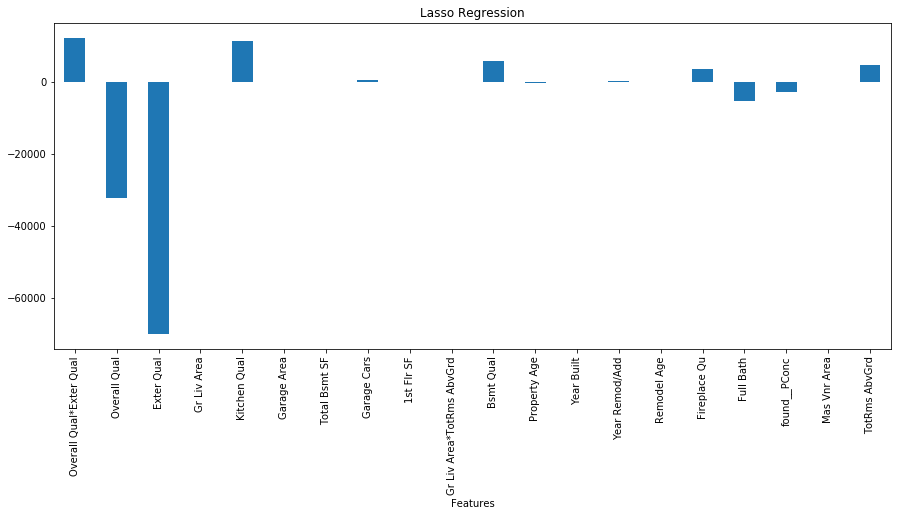

In [162]:
# 6.Uses lasso regression to obtain the subset of features that minimizes prediction error
# by imposing a constraint on the model parameters that causes regression coefficients for some variables to shrink
# toward zero.
df=pd.Series(lassos.coef_,index=features).plot.bar(figsize=(15,6))
plt.title('Lasso Regression')
plt.xlabel('Features');

In [163]:
# 7.obtain residuals 
residuals_lassos=ys_test-pred_lassos

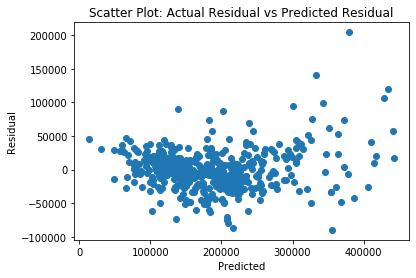

In [164]:
# 8 Plot scatterplot for residual vs prediction.
plt.scatter(pred_lassos,residuals_lassos)
plt.title('Scatter Plot: Actual Residual vs Predicted Residual')
plt.xlabel('Predicted')
plt.ylabel('Residual');

the distribution of residuals vs predicted is Heteroscedasticity 


In [165]:
print('Xs_train shape :',Xs_train.shape)
print('ys_train shape :',ys_train.shape)
print('Xs_test shape :',Xs_test.shape)
print('ys_test shape :',ys_test.shape)

Xs_train shape : (1536, 20)
ys_train shape : (1536,)
Xs_test shape : (512, 20)
ys_test shape : (512,)


In [166]:
# To get Lasso optimal alpha
lassos_optima_alpha=lassos.alpha_
print('Lassos Optima Alpha :',lassos_optima_alpha)

Lassos Optima Alpha : 0.146


In [167]:
lassos_optima=Lasso(alpha=lassos_optima_alpha)

In [168]:
Lassos_MSE_Train= (-cross_val_score(lassos_optima, Xs_train,ys_train, cv=10, scoring='neg_mean_squared_error').mean())
Lassos_R2_Score_Train=(cross_val_score(lassos_optima, Xs_train,ys_train, cv=10, scoring='r2').mean())
print('Lasso MSE Train :',Lassos_MSE_Train)
print('Lasso RMSE Train :',np.sqrt(Lassos_MSE_Train))
print('Lasso R2 Score Train :',Lassos_R2_Score_Train)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 330248173261.7073, tolerance: 800772695.9590346
  positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 371655799480.83936, tolerance: 873603527.2141967
  positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 409195364288.0939, tolerance: 845305229.0660832
  positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 366

Lasso MSE Train : 1158143624.9489448
Lasso RMSE Train : 34031.50929578271
Lasso R2 Score Train : 0.8058776976415627


C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 367446585154.0044, tolerance: 807666601.4698231
  positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 462602380511.4891, tolerance: 872145152.5027637
  positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 399253175988.1555, tolerance: 874361084.4431585
  positive)


In [169]:
Lassos_MSE_Test= (-cross_val_score(lassos_optima, Xs_test,ys_test, cv=10, scoring='neg_mean_squared_error').mean())
Lassos_R2_Score_Test=(cross_val_score(lassos_optima, Xs_test,ys_test, cv=10, scoring='r2').mean())
print('Lasso MSE Test :',Lassos_MSE_Test)
print('Lasso RMSE Test :',np.sqrt(Lassos_MSE_Test))
print('Lasso R2 Score Test :',Lassos_R2_Score_Test)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 94430981030.96797, tolerance: 302986054.2586997
  positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 136464910006.12788, tolerance: 295357164.8883861
  positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 146558606853.83295, tolerance: 313188270.0896325
  positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12

Lasso MSE Test : 753438004.6492414
Lasso RMSE Test : 27448.825196158057
Lasso R2 Score Test : 0.8778974702953753


C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 105261044984.58496, tolerance: 319722759.46148026
  positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 87977503874.5588, tolerance: 319997555.2910868
  positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 63284299131.295364, tolerance: 308904834.47600085
  positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1

<font color=blue>Based on the score above, the top features 9.that influences House sale Price are: External Quality, Overall Quality,Interaction of External Quality & Overall Quality, Kitchen Quality,Garage Call, Basment Quality,Property Age, Year remodel/Add, Full Bath, found_pCon, Total Room Above Ground and FirePlace Quality.<br>
Removing features that shows '0'magnitude in lasso regression chart does not imporved the model score.

In [170]:
# After removing. 

# Apply Model on Test Dataset

In [171]:
# Create our features matrix (X) and target vector (y) for Test Dataset.
X=train_final[features]
y=train_final['SalePrice']

X_test=test_final[features]

In [172]:
# Scaling
ss=StandardScaler()
X_ss=ss.fit_transform (X)
X_test_ss=ss.fit_transform (X_test)

In [173]:
# Fit
lassos_optima.fit(X,y)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 602061767085.5146, tolerance: 1287651448.9129457
  positive)


Lasso(alpha=0.146, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [174]:
#Predict
predicted_price=lassos_optima.predict(X_test)

In [175]:
# check length of predicted price
len(predicted_price)

879

In [176]:
# Preview
predicted_price[:10]

array([132289.67064855, 198678.47214299, 201795.76514547, 111071.05894803,
       182933.46318154, 101159.54248066, 119075.18792764, 155916.67421094,
       211813.2941281 , 153326.72296661])

In [177]:
# Create Submmison df and save as csv
submission= pd.DataFrame(columns = ['Id', 'SalePrice'])
submission['Id'] = test_final['Id']
submission['SalePrice'] = predicted_price

In [178]:
# Check Head
submission.head()

,Id,SalePrice
0,2658,132289.670649
1,2718,198678.472143
2,2414,201795.765145
3,1989,111071.058948
4,625,182933.463182


In [179]:
# export to csv
# submission.to_csv('submission.csv',index=False)

# Conclusion and Recommendations

<font color=blue>Based on the score above, the top features 9.that influences House sale Price are: External Quality, Overall Quality,Interaction of External Quality & Overall Quality, Kitchen Quality,Garage Call, Basment Quality,Property Age, Year remodel/Add, Full Bath, found_pCon, Total Room Above Ground and FirePlace Quality.<br>
Removing features that shows '0'magnitude in lasso regression chart does not imporved the model score.